# Initialisation & Setup

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Using Seaborn's aesthetic theme
sns.set_theme()

# Loading Data into Data frame

In [2]:
raw_loans = pd.read_csv('loan.csv', dtype={47:str}, low_memory=False)

# number of rows and columns
print("Number of rows: ", len(raw_loans))
print("Number of Columns: ", len(raw_loans.columns))

raw_loans.head()

Number of rows:  39717
Number of Columns:  111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

## Fixing Rows & Columns

### Row Clean Up
- Removing loans that are still in progress

In [3]:
loans = raw_loans[raw_loans['loan_status'] != 'Current']
loans.shape

(38577, 111)

### Columns Clean Up 

#### Checking columns with nan values

In [4]:
loans.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [5]:
print(len(loans.columns[loans.isna().all()]), "collumns have nan values in all rows, these columns can be dropped")

55 collumns have nan values in all rows, these columns can be dropped


##### Dropping columns with all nan values

In [6]:
loans = loans.dropna(axis=1, how='all')

# Left with columns data
print("Columns left: ", len(loans.columns))

Columns left:  56


#### Checking columns with only one unique values

In [7]:
loans.columns[loans.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [8]:
unique_value_cols = loans.columns[loans.nunique() == 1]

print(len(unique_value_cols), "columns have only one unique value, these columns can be dropped as they do not provide any useful information")

11 columns have only one unique value, these columns can be dropped as they do not provide any useful information


##### Dropping columns with all same values

In [9]:
loans = loans.drop(unique_value_cols, axis=1)

# Left with columns data
print("Columns left: ", len(loans.columns))

Columns left:  45


### Dropping Un-useful Columns

In [10]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

In [11]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [12]:
for column in loans.columns:
    unique_count = loans[column].nunique()
    print(f"{column} : {unique_count}")

id : 38577
member_id : 38577
loan_amnt : 870
funded_amnt : 1019
funded_amnt_inv : 8050
term : 2
int_rate : 370
installment : 15022
grade : 7
sub_grade : 35
emp_title : 28027
emp_length : 11
home_ownership : 5
annual_inc : 5215
verification_status : 3
issue_d : 55
loan_status : 2
url : 38577
desc : 25803
purpose : 14
title : 19297
zip_code : 822
addr_state : 50
dti : 2853
delinq_2yrs : 11
earliest_cr_line : 524
inq_last_6mths : 9
mths_since_last_delinq : 95
mths_since_last_record : 111
open_acc : 40
pub_rec : 5
revol_bal : 21275
revol_util : 1088
total_acc : 82
total_pymnt : 36714
total_pymnt_inv : 36387
total_rec_prncp : 6841
total_rec_int : 34025
total_rec_late_fee : 1320
recoveries : 4040
collection_recovery_fee : 2616
last_pymnt_d : 101
last_pymnt_amnt : 34418
last_credit_pull_d : 106
pub_rec_bankruptcies : 3


#### Now we have 45 columns out of which we have some columns not useful for the analysis
- Columns such as 'url', 'desc', 'title', doesn't contribute to loan defaulting in any way. So excluding them from analysis.
- Column 'id', 'member_id' have all unique values, which means we don't have any duplicate data of a member. And both pair of values in the columns represent the same person. So we can use any one of the column as an index. Hence dropping the later.
- 'emp_title' has 28,027 unique values out of 38,577 total values. So it doesn't contribute usefully to the analysis. So dropping that.
- Among 'zip_code', 'addr_state' any one of them can be used for analysis based on location, so we can remove the earlier column.
- 'mths_since_last_delinq', 'mnths_since_last_record' has >60% missing values, so removing them.
- Columns such as 'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'recoveries', are part of post-loan approval. But we are analysing the data for pre-loan approval. Hence the said columns are removed.
- 'funded_amnt_inv', 'total_pymnt_inv' is useful for investors but doesn't contribute for analysing loan defaulter , so droping that.

In [13]:
loans = loans.drop(['member_id', 'url', 'desc', 'title', 'emp_title', 'zip_code', 'mths_since_last_delinq', 'mths_since_last_record', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'recoveries', 'funded_amnt_inv', 'total_pymnt_inv'], axis=1)
loans.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0,13648,83.70%,9,5863.155187,5000.00,863.16,0.00,May-16,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0,1687,9.40%,4,1008.710000,456.46,435.17,0.00,Sep-13,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0,2956,98.50%,10,3005.666844,2400.00,605.67,0.00,May-16,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0,5598,21%,37,12231.890000,10000.00,2214.92,16.97,Apr-16,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,0,7963,28.30%,12,5632.210000,5000.00,632.21,0.00,Jan-16,0.0


In [14]:
loans.shape

(38577, 31)

In [15]:
loans.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

#### Checking for missing values

In [16]:
missing = (loans.isna().sum()/len(loans.index))*100
missing[missing>0]

emp_length              2.677761
revol_util              0.129611
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

In [17]:
missing = loans.isna().sum()
missing[missing>0]

emp_length              1033
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

#### Handling Missing Values
- Columns with missing values are 'emp_length', 'revol_util', 'last_credit_pull_d', 'pub_rec_bankruptcies'
- Let's see what type of data each column has

In [18]:
loans[['emp_length', 'revol_util', 'last_credit_pull_d', 'pub_rec_bankruptcies']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   emp_length            37544 non-null  object 
 1   revol_util            38527 non-null  object 
 2   last_credit_pull_d    38575 non-null  object 
 3   pub_rec_bankruptcies  37880 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [19]:
print("Mode : ", loans['emp_length'].mode()[0])
loans['emp_length'].value_counts()

Mode :  10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### The above value counts shows that the mode value has higher frequency than that of the next most frequent value.
- Since the missing values are in a very low percentage, imputing the missing values with the mode of the existing 'emp_length' values doesn't effect the analysis much.
- Hence assigning the mode to the null values in the column

In [20]:
loans['emp_length'].fillna(loans['emp_length'].mode()[0], inplace = True)
loans['emp_length'].isna().sum()

0

In [21]:
missing = (loans.isna().sum()/len(loans.index))*100
missing[missing>0]

revol_util              0.129611
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

Dropping the rows with empty values in the columns: 'revol_util', 'last_credit_pull_d' , as the percent of missing values are very very small.

In [22]:
loans = loans[~loans.revol_util.isnull()]
loans = loans[~loans.last_credit_pull_d.isnull()]

In [23]:
print("Mode : ", loans['pub_rec_bankruptcies'].mode()[0])
loans['pub_rec_bankruptcies'].value_counts()

Mode :  0.0


0.0    36188
1.0     1636
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

##### The above value counts shows that the mode value has higher frequency than that of the next most frequent value.
- Since the missing values are in a very low percentage, imputing the missing values with the mode of the existing 'pub_rec_bankruptcies' values doesn't effect the analysis much.
- Hence assigning the mode to the null values in the column

In [24]:
loans['pub_rec_bankruptcies'].fillna(loans['pub_rec_bankruptcies'].mode()[0], inplace = True)
loans['pub_rec_bankruptcies'].isna().sum()

0

In [25]:
missing = loans.isna().sum()
print("Missing values: ", missing[missing>0])

Missing values:  Series([], dtype: int64)


In [26]:
loans.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0,13648,83.70%,9,5863.155187,5000.00,863.16,0.00,May-16,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0,1687,9.40%,4,1008.710000,456.46,435.17,0.00,Sep-13,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0,2956,98.50%,10,3005.666844,2400.00,605.67,0.00,May-16,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0,5598,21%,37,12231.890000,10000.00,2214.92,16.97,Apr-16,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,0,7963,28.30%,12,5632.210000,5000.00,632.21,0.00,Jan-16,0.0


In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38525 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38525 non-null  int64  
 1   loan_amnt             38525 non-null  int64  
 2   funded_amnt           38525 non-null  int64  
 3   term                  38525 non-null  object 
 4   int_rate              38525 non-null  object 
 5   installment           38525 non-null  float64
 6   grade                 38525 non-null  object 
 7   sub_grade             38525 non-null  object 
 8   emp_length            38525 non-null  object 
 9   home_ownership        38525 non-null  object 
 10  annual_inc            38525 non-null  float64
 11  verification_status   38525 non-null  object 
 12  issue_d               38525 non-null  object 
 13  loan_status           38525 non-null  object 
 14  purpose               38525 non-null  object 
 15  addr_state         

### Standardizing Data

int_rate and revol_util are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [28]:
#stripping '%' value
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')

issue_d contains date values, let convert column data type to date.

In [29]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')

For emp_length 
- < 1 year is assumed as 0
- 10+ years is assumed as 10 

In [30]:
loans['emp_length'] = loans['emp_length'].apply( lambda x: 0 if "<" in x else ( int(x.split('+')[0]) if "+" in x else (int(x.split()[0])) ) )

In [31]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38525 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38525 non-null  int64         
 1   loan_amnt             38525 non-null  int64         
 2   funded_amnt           38525 non-null  int64         
 3   term                  38525 non-null  object        
 4   int_rate              38525 non-null  float64       
 5   installment           38525 non-null  float64       
 6   grade                 38525 non-null  object        
 7   sub_grade             38525 non-null  object        
 8   emp_length            38525 non-null  int64         
 9   home_ownership        38525 non-null  object        
 10  annual_inc            38525 non-null  float64       
 11  verification_status   38525 non-null  object        
 12  issue_d               38525 non-null  datetime64[ns]
 13  loan_status     

## Outlier Treatment


#### Remove outliers
Columns to remove outliers on:
 - loan_amnt
 - funded_amnt
 - annual_inc
 - int_rate

In [32]:
raw_raw_count = len(raw_loans)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
    return df.loc[filter]

# remove outliers
loans = remove_outliers(loans, 'loan_amnt')
loans = remove_outliers(loans, 'funded_amnt')
loans = remove_outliers(loans, 'annual_inc')
loans = remove_outliers(loans, 'int_rate')

# calculate percentage of data removed
print("Percentage of data removed: ", round((1 - len(loans)/raw_raw_count) * 100, 2), "%")

Percentage of data removed:  10.38 %


## Derived Variables

#### Add new columns
- Add column for loan status (0 = not default, 100 = default)
- Add column for loan term (0 = 36 months, 1 = 60 months)
- Add column for loan grade (A-G)
- Add column for loan subgrade (1-5)
- Add column for loan issue month (1-12)
- Add column for loan issue year (2007-2015)


In [33]:
# add a new column to indicate if the loan is fully paid or not ( 0 - fully paid, 100 - defaulted)
# defaulted is set to 100 to make it easier to calculate the percentage of loans that are defaulted
loans['default'] = np.where(loans['loan_status'].isin(['Fully Paid']), 0, 100)

loans['term_num'] = loans['term'].apply(lambda x: int(x.split()[0]))

# convert issue_d to datetime
# Added in Standardising Data Section & 'issue_month',  'issue_year' are not considered in the new refined data
# loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')
loans['issue_month'] = loans['issue_d'].dt.month
loans['issue_year'] = loans['issue_d'].dt.year

# convert loan grade to numeric
loans['grade_num'] = loans['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

# convert loan sub grade to numeric
loans['sub_grade_num'] = loans['sub_grade'].map({'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
                                                    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
                                                    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
                                                    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
                                                    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
                                                    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
                                                    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35})

# Added in Standardising Data Section
# convert emp_length to numeric
# loans['emp_length_num'] = loans['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
#                                                     '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
#                                                     '10+ years': 10})

# Added in Standardising Data Section
# convert int_rate to numeric
# loans['int_rate_num'] = loans['int_rate'].str.rstrip('%').astype('float')

# Added in Standardising Data Section
# convert revol_util to numeric
# loans['revol_util_num'] = loans['revol_util'].str.rstrip('%').astype('float')

In [34]:
loans['verification_status'].value_counts()

Not Verified       16234
Verified           10364
Source Verified     8997
Name: verification_status, dtype: int64

In [35]:
import numpy_financial as npf

def calc_interest_rate(row):
    return (npf.rate(row['term_num'], row['installment'], -row['funded_amnt'], 0) * 12 * 100).round(2)

loans['total_amount_to_pay'] = loans['installment'] * loans['term_num']
loans['total_interest'] = loans['total_amount_to_pay'] - loans['funded_amnt']
loans['total_loss'] = loans.apply(lambda x: (x['total_pymnt'] - x['total_amount_to_pay']) if x['default'] == 100 else 0, axis=1)
loans['loss_percentage'] = (loans['total_loss'] / loans['total_amount_to_pay'] * 100).abs().round(2)

loans['calc_interest_rate'] = loans.apply(calc_interest_rate, axis=1)

## High level information

In [36]:
# average default rate
print("Average default rate: ", (loans['default'].mean()).round(1), "%")

Average default rate:  14.4 %


In [37]:
# avg loss percentage for defaulted loans
print("Average loss percentage for defaulted loans: ", (loans['loss_percentage'].mean()).round(2), '%')

# total funded loan amount
total_funded_amount = loans['funded_amnt'].sum()
print("Total funded loan amount: ", f"{total_funded_amount.round(0):,}", "$")

# total recovered amount
total_recovered_amount = loans['total_pymnt'].sum()
print("Total recovered amount: ", f"{total_recovered_amount.round(0):,}", "$")

loans['profit'] = loans['total_pymnt'] - loans['funded_amnt']

Average loss percentage for defaulted loans:  7.98 %
Total funded loan amount:  352,039,225 $
Total recovered amount:  386,007,099.0 $


# Understanding the data

To confirm the understanding of the loan amount and interest rate, the following check is made:
```
Check if the calculated interest rate on total amount to pay (installment * term) is equal to the provided interest rate within a reasonable margin of error (0.1%)
The margin of error could arise by different interest calculation methods, and rounding
```

only 10 rows seem to be not correct, this could happen due to mid term changes in interest rate or any other reason. The rows are removed from the dataset.

In [38]:
# print rows where calc_interest_rate is not equal to int_rate within 0.1% tolerance
print("Number of loans that are not within the tolerance", len(loans[(loans['calc_interest_rate'] - loans['int_rate']).abs() > 0.1]))

# drop rows where calc_interest_rate is not equal to int_rate within 0.1% tolerance
loans = loans[(loans['calc_interest_rate'] - loans['int_rate']).abs() <= 0.1]

Number of loans that are not within the tolerance 10


In [39]:
# show all columns with null values
print("Columns with null values: ")
print(loans.isnull().sum()[loans.isnull().sum() > 0])

Columns with null values: 
Series([], dtype: int64)


# Data analysis
Finding relation of default rate with different variables

### Default rate by year and months (inconclusive)

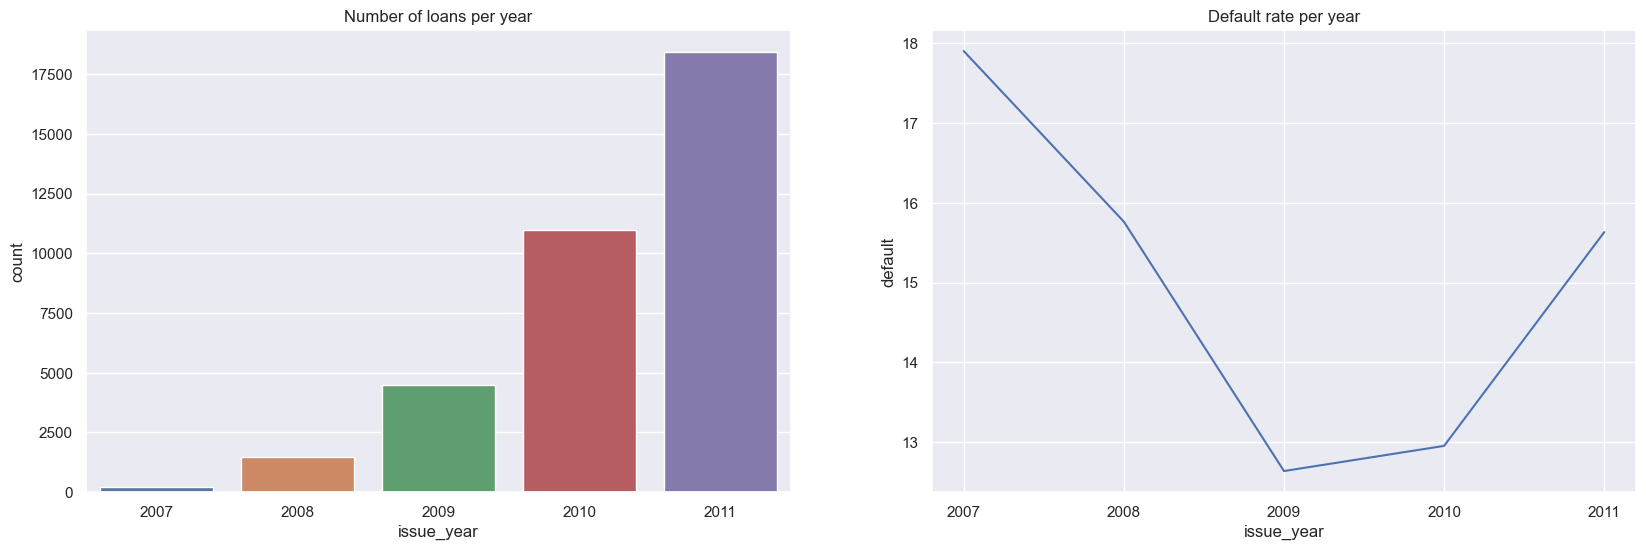

<Figure size 1200x600 with 0 Axes>

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# number of loans per year
sns.countplot(x='issue_year', data=loans, ax=ax1)
ax1.set_title('Number of loans per year')


# draw line chart of defaulted loans percentage per year
plt.figure(figsize=(12, 6))
df = loans.groupby(['issue_year']).agg({'default': 'mean'}).reset_index()
sns.lineplot(x='issue_year', y='default', data=df, ax=ax2)
ax2.set_xticks(df['issue_year'])
ax2.set_title('Default rate per year')

plt.show()

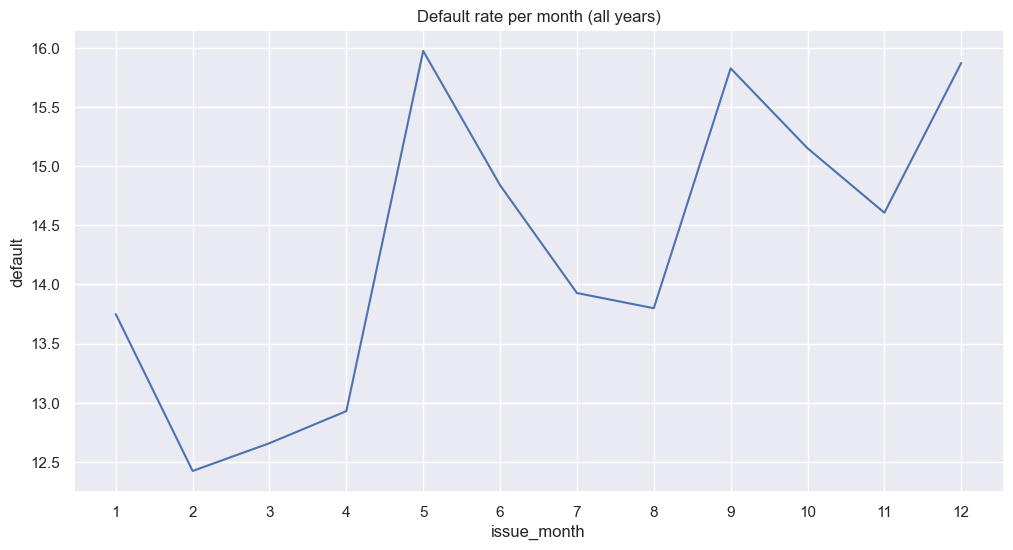

In [41]:
# draw line chart of defaulted loans percentage per month
plt.figure(figsize=(12, 6))
df = loans.groupby(['issue_month']).agg({'default': 'mean'}).reset_index()
sns.lineplot(x='issue_month', y='default', data=df)
plt.xticks(df['issue_month'])
plt.title('Default rate per month (all years)')
plt.show()

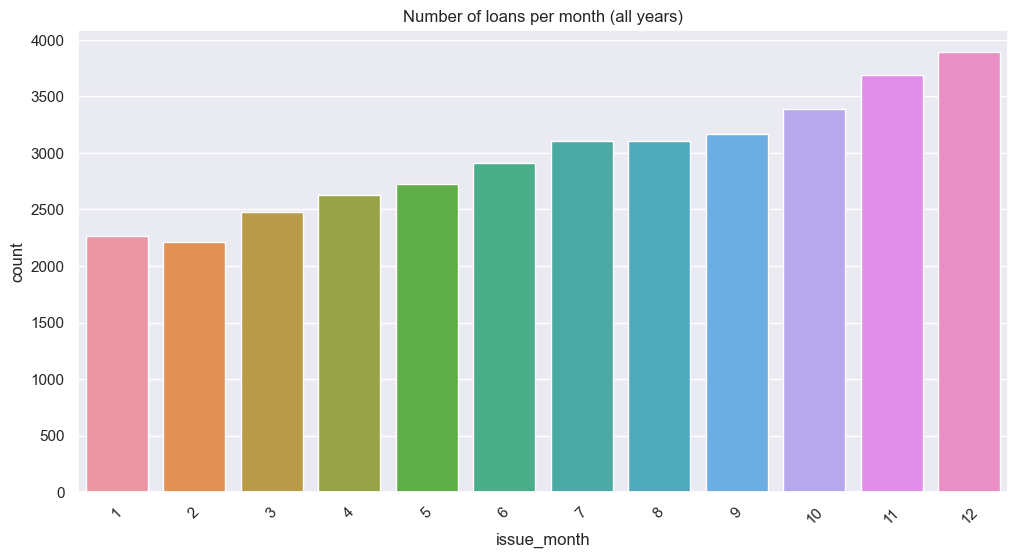

In [42]:
# plot number of loans per month
plt.figure(figsize=(12, 6))

sns.countplot(x='issue_month', data=loans)
plt.xticks(rotation=45)
plt.title('Number of loans per month (all years)')
plt.show()

### Default rate by grade and subgrade (not relevant)

Grade is assigned by lending club based on the credit score of the borrower. The subgrade is a more granular classification of the grade. The default rate is higher for lower grades and subgrades.
So interest rate is higher for lower grades and subgrades.

Lending club is giving more loans to better grades.

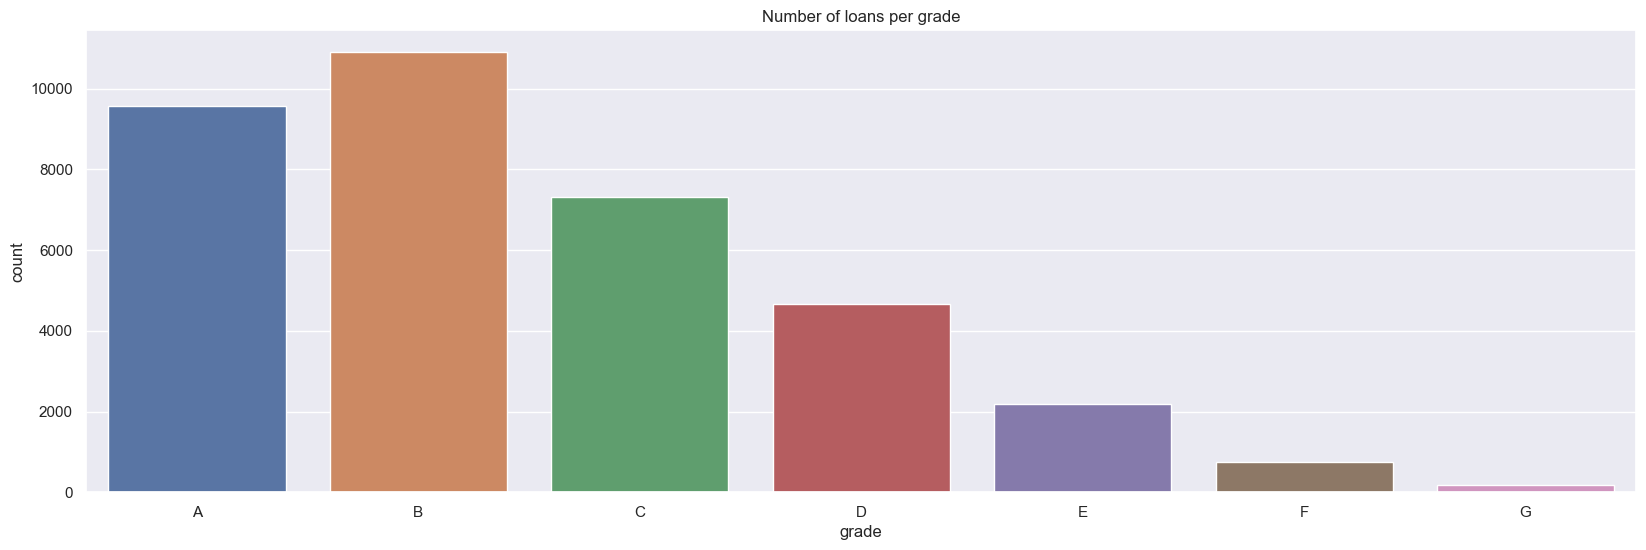

In [43]:
# plot number of loans per grade
plt.figure(figsize=(20, 6))
sns.countplot(x='grade', data=loans, order=sorted(loans['grade'].unique()))
plt.title('Number of loans per grade')
plt.show()

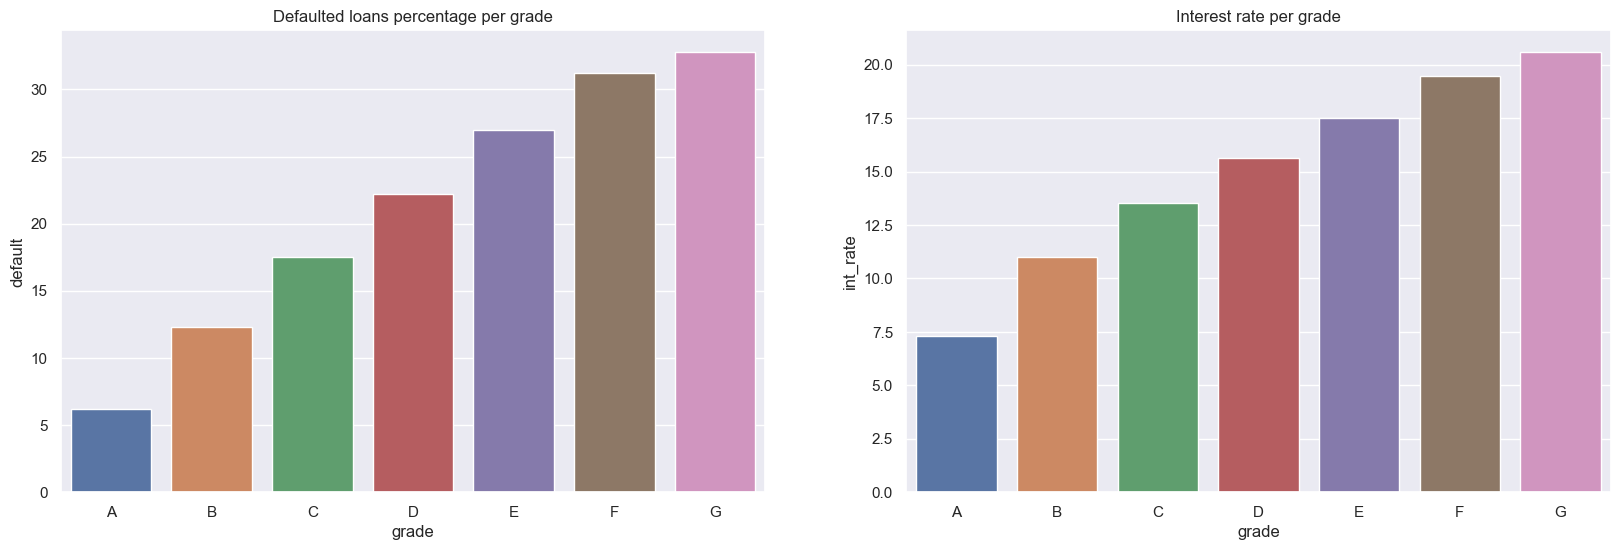

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# draw line chart of defaulted loans percentage per grade
default_rate = loans.groupby(['grade']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='grade', y='default', data=default_rate, ax=ax1)
ax1.set_title('Defaulted loans percentage per grade')

# draw interest rate per grade
interest_rate = loans.groupby(['grade']).agg({'int_rate': 'mean'}).reset_index()
sns.barplot(x='grade', y='int_rate', data=interest_rate, ax=ax2)
ax2.set_title('Interest rate per grade')

plt.show()

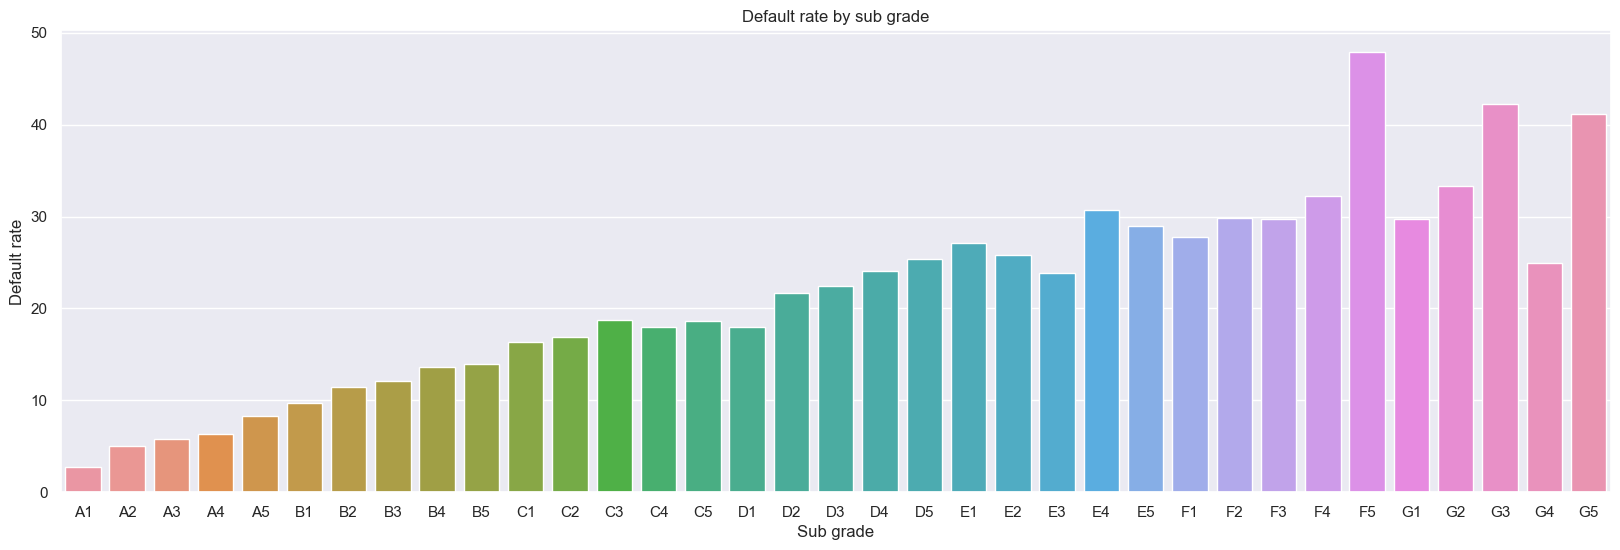

In [45]:
# plot default rate by sub grade
plt.figure(figsize=(20, 6))
default_rate_sub_grade = loans[['sub_grade', 'default']].copy()
default_rate_sub_grade = default_rate_sub_grade.groupby(['sub_grade']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='sub_grade', y='default', data=default_rate_sub_grade)
plt.title('Default rate by sub grade')
plt.xlabel('Sub grade')
plt.ylabel('Default rate')
plt.show()

### Default rate by term size (huge impact)

There are 2 term sizes 36 and 60 months. The default rate is higher for 60 months term size by 2 times, this also reflects in the interest rate.

Although the number of loans given for 60 months term size is less than a quarter of the total loans, the default loans count is 40% of the total default loans.
While the 60 month term loans constitute 30% of the total funds, the loss brought in by these loans is almost 60% of the total loss.

This could be due to the fact that the borrower is more likely to default if the loan is longer, as the borrower is more likely to have a change in financial situation.

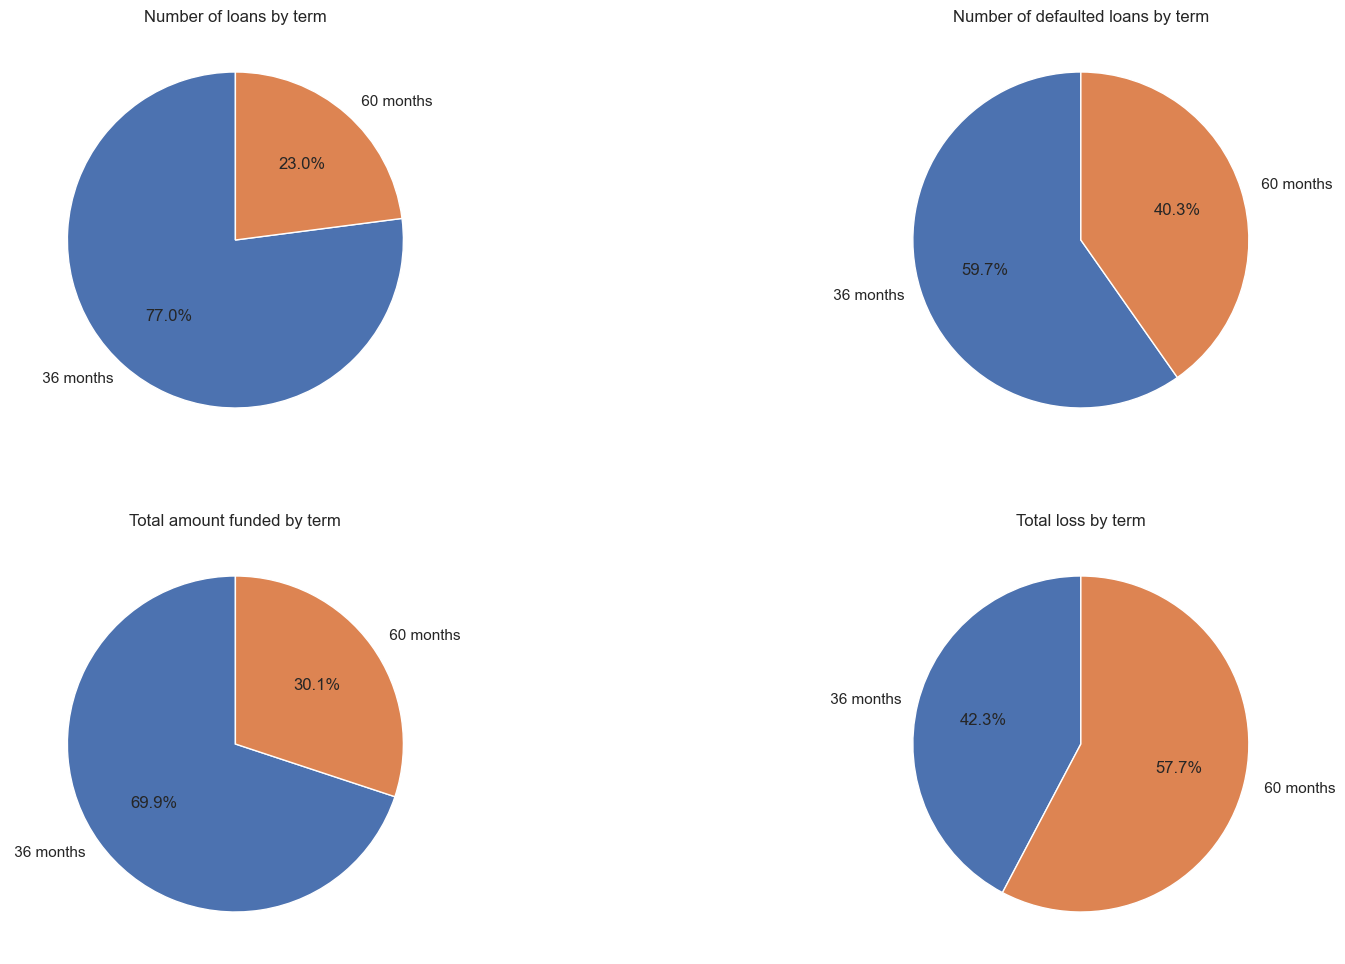

In [46]:
fig, plots = plt.subplots(2, 2, figsize=(20, 12))

# draw pie chart of number of loans by term
term = loans.groupby(['term']).agg({'id': 'count'}).reset_index()
plots[0, 0].pie(term['id'], labels=term['term'], autopct='%1.1f%%', startangle=90)
plots[0, 0].set_title('Number of loans by term')

# draw pie chart of number of defaulted loans by term
defaulted_loans = loans[loans['default'] != 0]
defaulted_loans = defaulted_loans.groupby(['term']).agg({'id': 'count'}).reset_index()
plots[0, 1].pie(defaulted_loans['id'], labels=defaulted_loans['term'], autopct='%1.1f%%', startangle=90)
plots[0, 1].set_title('Number of defaulted loans by term')

# total amount funded by term
total_amount_funded = loans.groupby(['term']).agg({'funded_amnt': 'sum'}).reset_index()
plots[1, 0].pie(total_amount_funded['funded_amnt'], labels=total_amount_funded['term'], autopct='%1.1f%%', startangle=90)
plots[1, 0].set_title('Total amount funded by term')

# total loss by term
total_loss = loans.groupby(['term']).agg({'total_loss': 'sum'}).reset_index()
total_loss['total_loss'] = total_loss['total_loss'].abs()
plots[1, 1].pie(total_loss['total_loss'], labels=total_loss['term'], autopct='%1.1f%%', startangle=90)
plots[1, 1].set_title('Total loss by term')

plt.show()

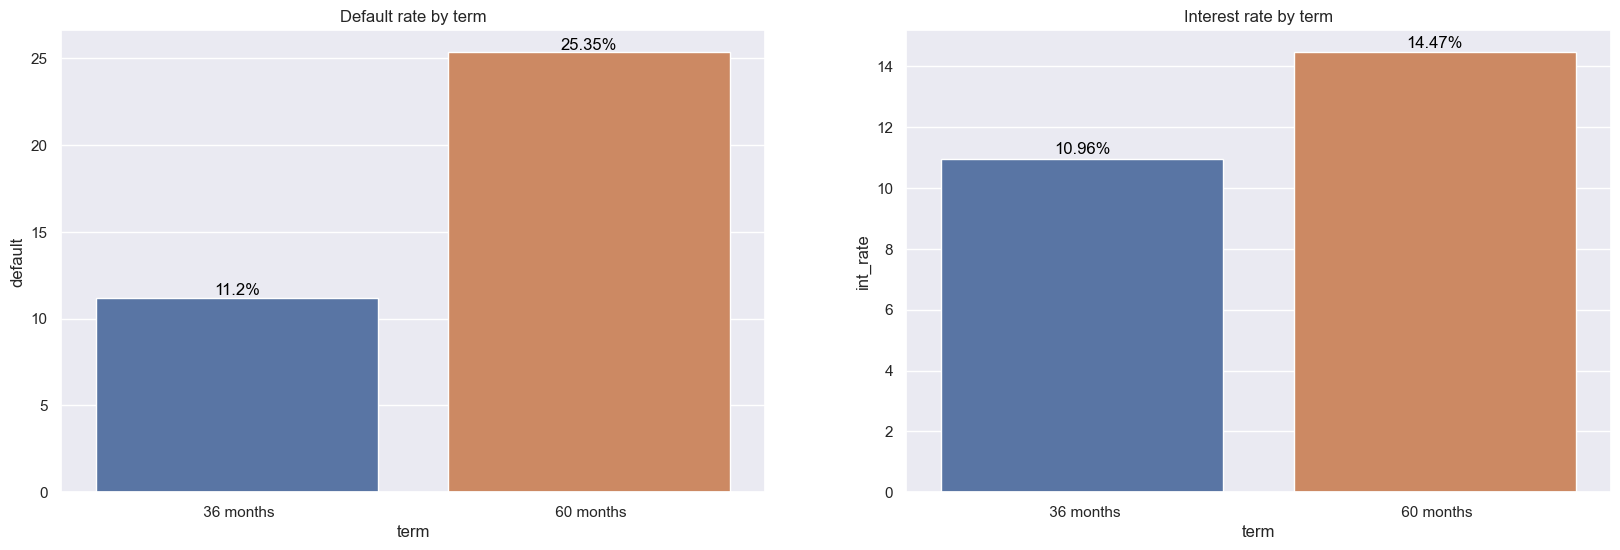

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# plot default rate by term
default_rate = loans.groupby(['term']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='term', y='default', data=default_rate, ax=ax1)

# show values on top of bars
for index, row in default_rate.iterrows():
    ax1.text(row.name, row.default + 0.15, str(round(row.default, 2)) + '%', color='black', ha="center")
ax1.set_title('Default rate by term')

# plot interest rate by term
interest_rate = loans.groupby(['term']).agg({'int_rate': 'mean'}).reset_index()
sns.barplot(x='term', y='int_rate', data=interest_rate, ax=ax2)

# show values on top of bars
for index, row in interest_rate.iterrows():
    ax2.text(row.name, row.int_rate + 0.15, str(round(row.int_rate, 2)) + '%', color='black', ha="center")
ax2.set_title('Interest rate by term')

plt.show()

### Default rate by purpose (some impact)

Most of the loans on the platform are for debt consolidation.

Small businesses, renewable energy and education have the highest default rate (15% - 20%)
Car, credit card, major puchase and wedding have the lowest default rate (about 10%)

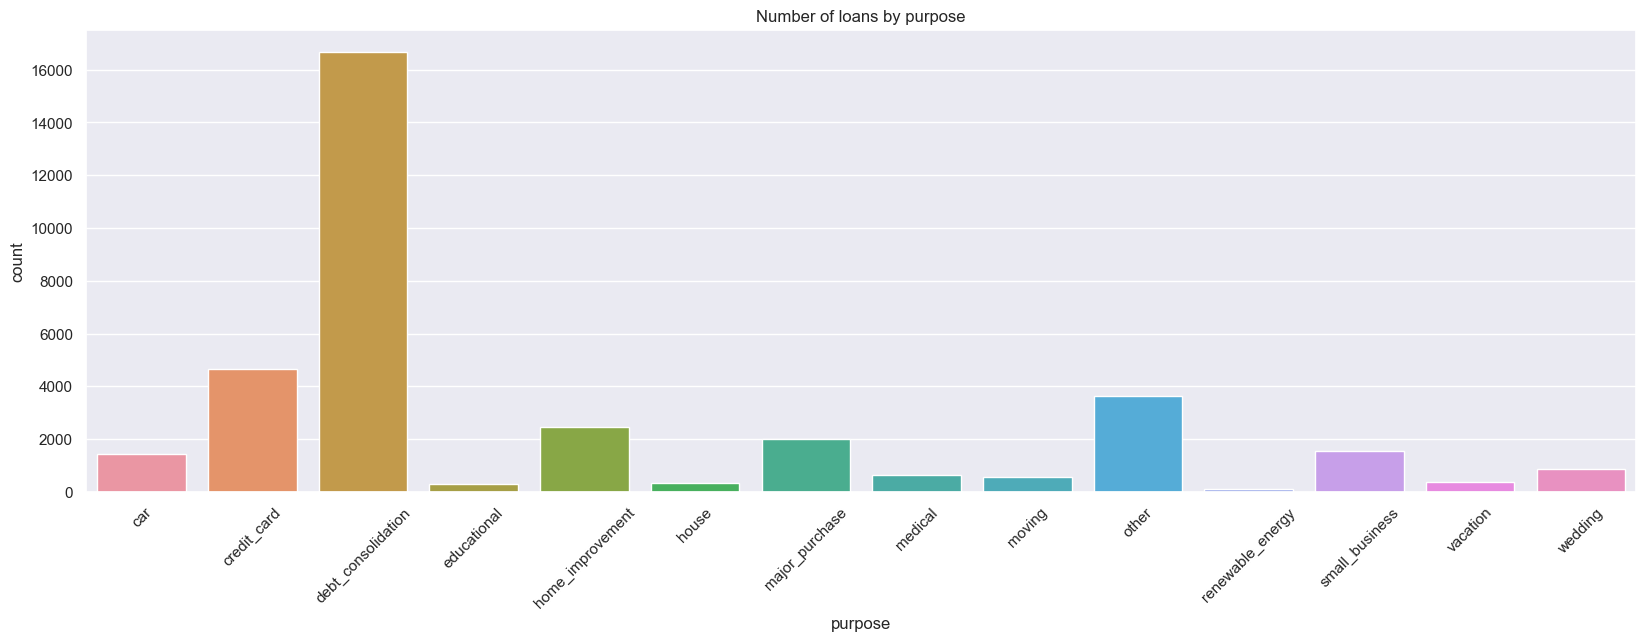

In [48]:
# plot pie chart of number of loans by purpose
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=loans, order=sorted(loans['purpose'].unique()))
plt.title('Number of loans by purpose')
plt.xticks(rotation=45)
plt.show()

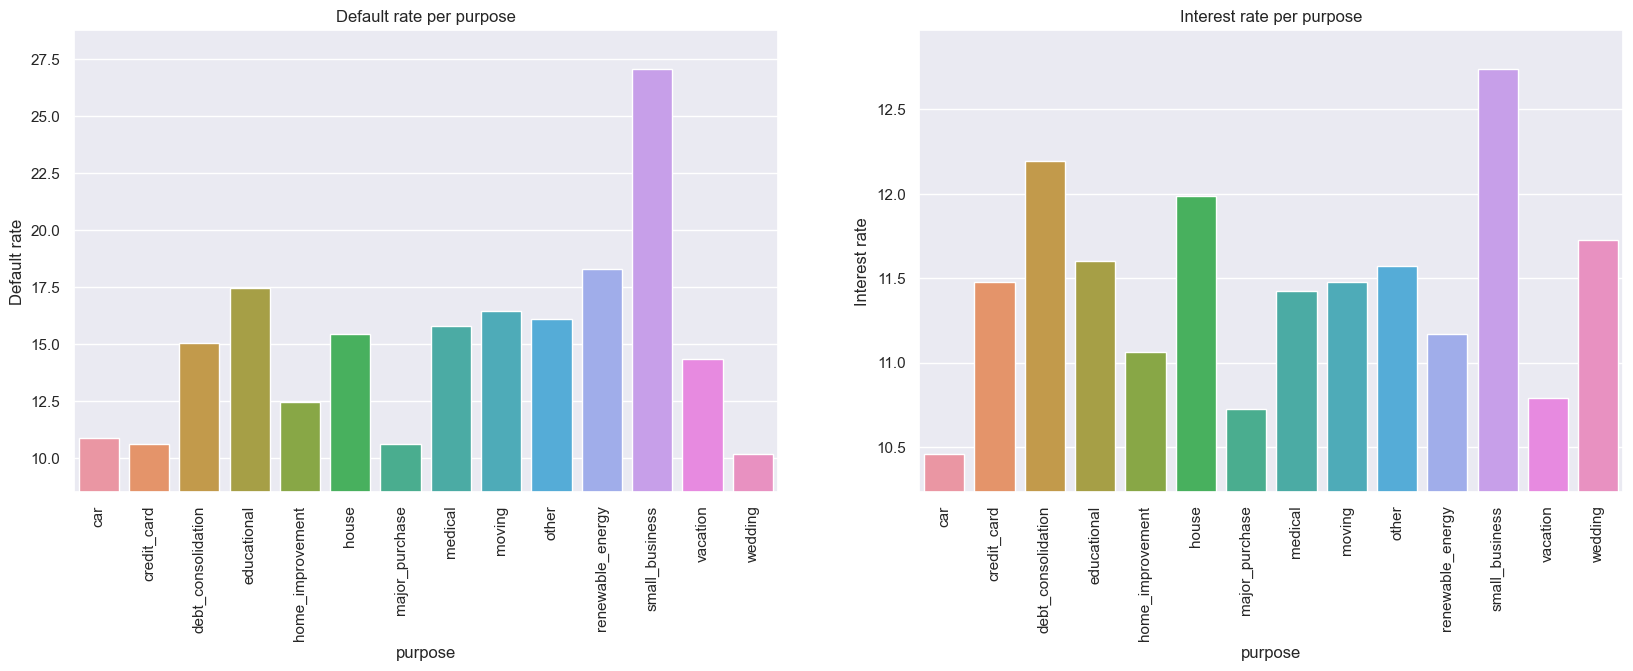

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# draw loan default percentage per purpose
default_rate = loans.groupby(['purpose']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='purpose', y='default', data=default_rate, ax=ax1)

# Get the minimum and maximum values
min_val = default_rate['default'].min()
max_val = default_rate['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
ax1.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Default rate per purpose')
ax1.set_ylabel('Default rate')

# draw interest rate per purpose
interest_rate = loans.groupby(['purpose']).agg({'int_rate': 'mean'}).reset_index()
sns.barplot(x='purpose', y='int_rate', data=interest_rate, ax=ax2)

# Get the minimum and maximum values
min_val = interest_rate['int_rate'].min()
max_val = interest_rate['int_rate'].max()

# Set the limits of y-axis to be slightly beyond the min and max
ax2.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Interest rate per purpose')
ax2.set_ylabel('Interest rate')

plt.show()

### Default rate by home ownership (no impact)

RENT        17689
MORTGAGE    15016
OWN          2787
OTHER          90
NONE            3
Name: home_ownership, dtype: int64


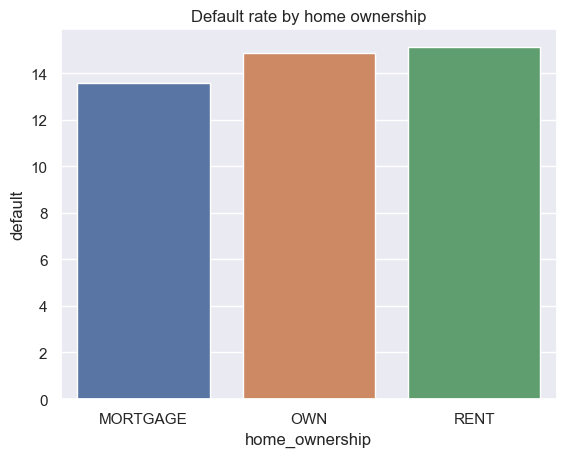

In [50]:
print(loans['home_ownership'].value_counts())

# ignore NONE and OTHERS as they are very few
loans = loans[loans['home_ownership'] != 'NONE']
loans = loans[loans['home_ownership'] != 'OTHER']

# plot default rate by home ownership
default_rate = loans.groupby(['home_ownership']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='home_ownership', y='default', data=default_rate)
plt.title('Default rate by home ownership')
plt.show()

### Default rate by income (good impact)

Default rate is higher for lower income groups because they are more likely to default due to their financial situation.

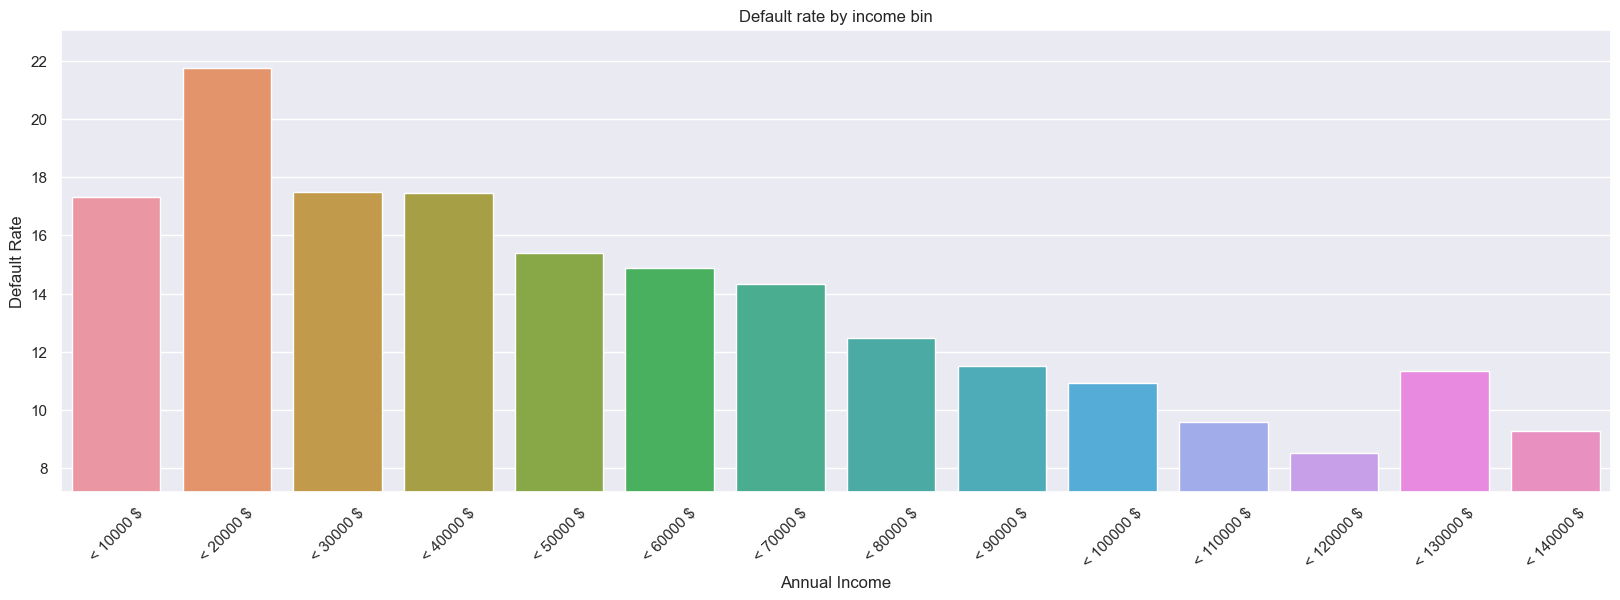

In [51]:
plt.figure(figsize=(20, 6))

# Copy the DataFrame to avoid SettingWithCopyWarning
default_rate_income = loans[['loan_status', 'annual_inc', 'default']].copy()

# Define user-friendly bin edges
bin_edges = range(0, int(default_rate_income['annual_inc'].max() + 10000), 10000)
default_rate_income['income_bin'] = pd.cut(default_rate_income['annual_inc'], bins=bin_edges, include_lowest=True, right=False)

default_rate_income = default_rate_income.groupby(['income_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='income_bin', y='default', data=default_rate_income)

# Get the minimum and maximum values from your data
min_val = default_rate_income['default'].min()
max_val = default_rate_income['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

bar_plot.set_xticklabels([f"< {str(interval.right)} $" for interval in default_rate_income['income_bin']], rotation=45)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.title('Default rate by income bin')
plt.show()

### Default rate by state (some impact)

Lending club is heavily used in California, Texas, New York and Florida.

Florida has the highest default rate (more than 17.5%) while Texas has the lowest default rate (less than 12%)

But the interest rate is not higher for states with higher default rate.

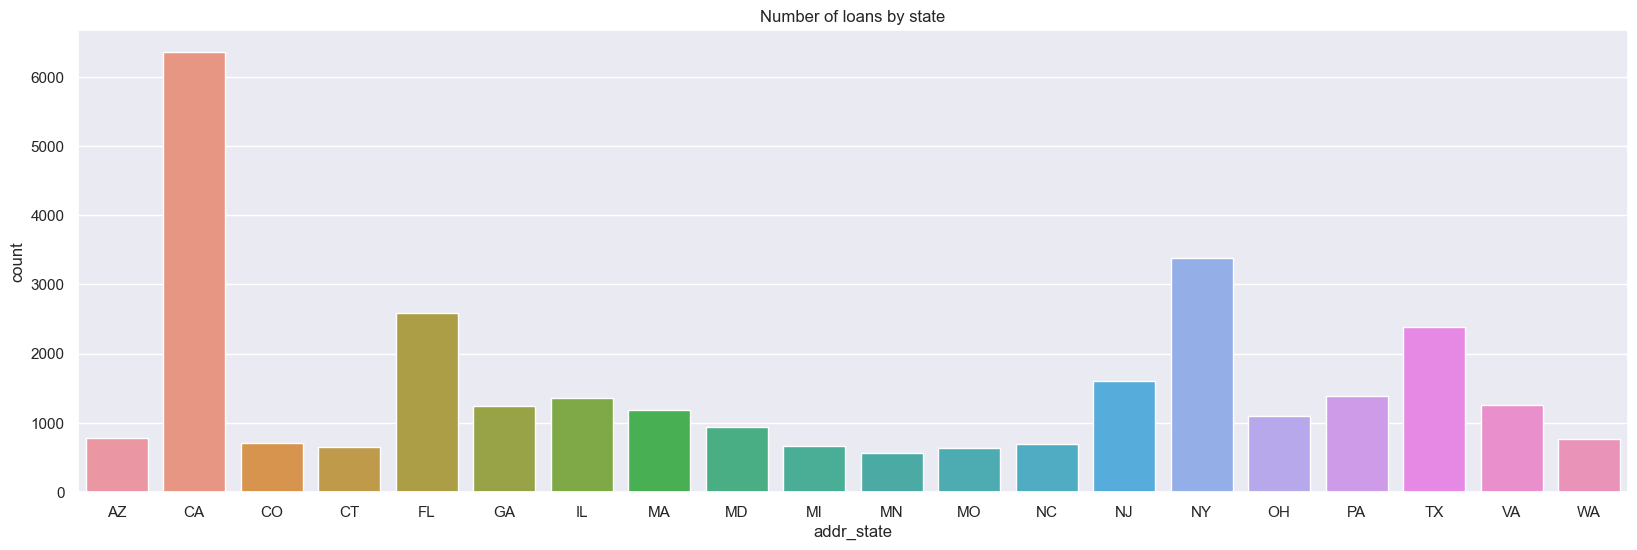

In [52]:
# plot number of loans by state
plt.figure(figsize=(20, 6))

loans_per_State = loans[['addr_state', 'default']].copy()

# ignore states with less than 100 loans
loans_per_State = loans_per_State.groupby(['addr_state']).filter(lambda x: len(x) > 500)

sns.countplot(x='addr_state', data=loans_per_State, order=sorted(loans_per_State['addr_state'].unique()))
plt.title('Number of loans by state')
plt.show()

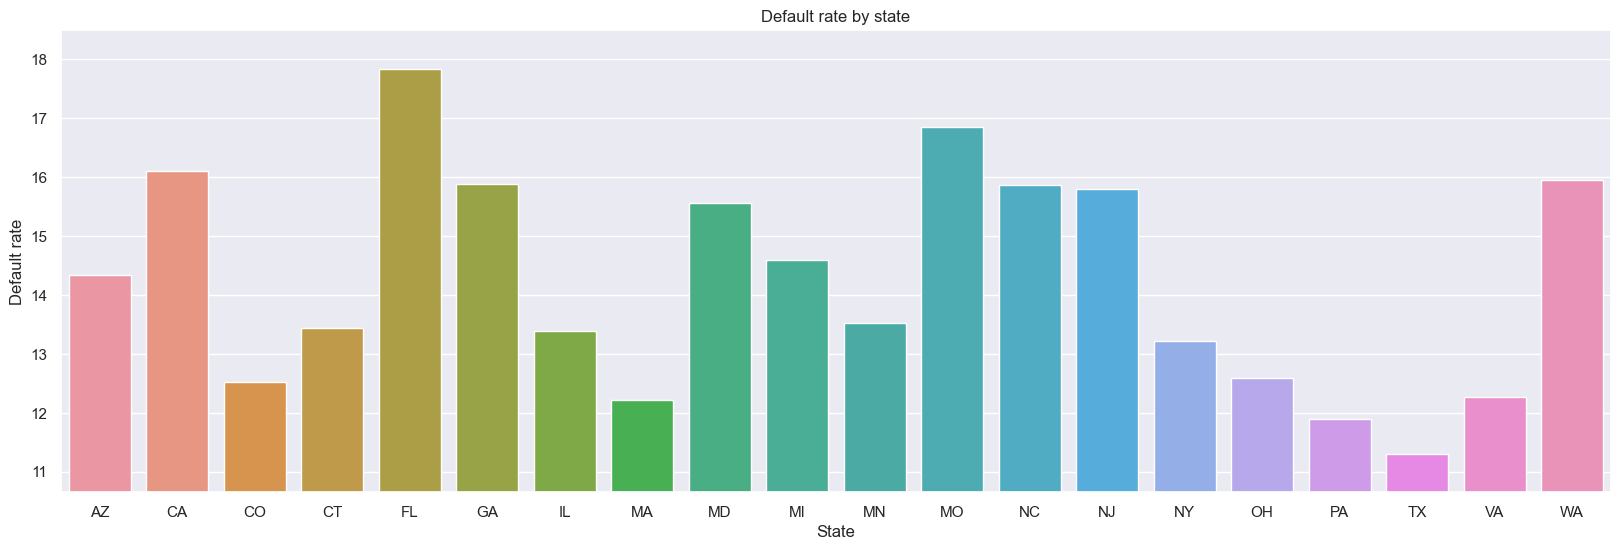

In [53]:
# show the default rate in each state
plt.figure(figsize=(20, 6))

loans_per_State = loans_per_State.groupby(['addr_state']).agg({'default': 'mean'}).reset_index()

ax = sns.barplot(x='addr_state', y='default', data=loans_per_State)

# Get the minimum and maximum values from your data
min_val = loans_per_State['default'].min()
max_val = loans_per_State['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
ax.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by state')
plt.xlabel('State')
plt.ylabel('Default rate')
plt.show()

In [54]:
fig = px.choropleth(
    loans_per_State, 
    locations='addr_state', 
    color='default',
    locationmode='USA-states', 
    scope="usa",
    title='Defaulters rate by State',
    color_continuous_scale=px.colors.sequential.Reds,
    labels={'percentage': 'Percentage of Defaulters'},
)
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})
fig.show()

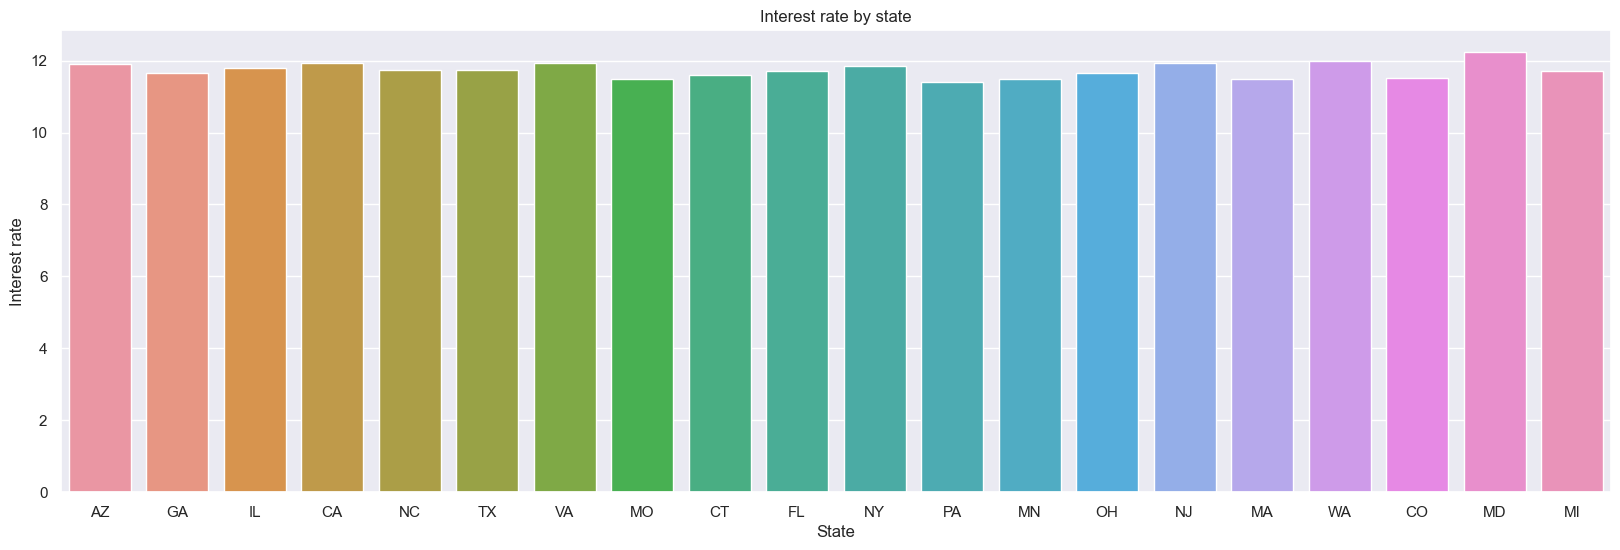

In [55]:
# interest rate by state
plt.figure(figsize=(20, 6))

loans_per_State = loans[['addr_state', 'int_rate']].copy()

# ignore states with less than 500 loans
loans_per_State = loans_per_State.groupby(['addr_state']).filter(lambda x: len(x) > 500)

sns.barplot(x='addr_state', y='int_rate', data=loans_per_State, errorbar=None)

plt.title('Interest rate by state')
plt.xlabel('State')
plt.ylabel('Interest rate')
plt.show()

### Default rate by public records (good impact)

Loans given to borrowers with public records have a much higher default rate.

0.0    33924
1.0     1563
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


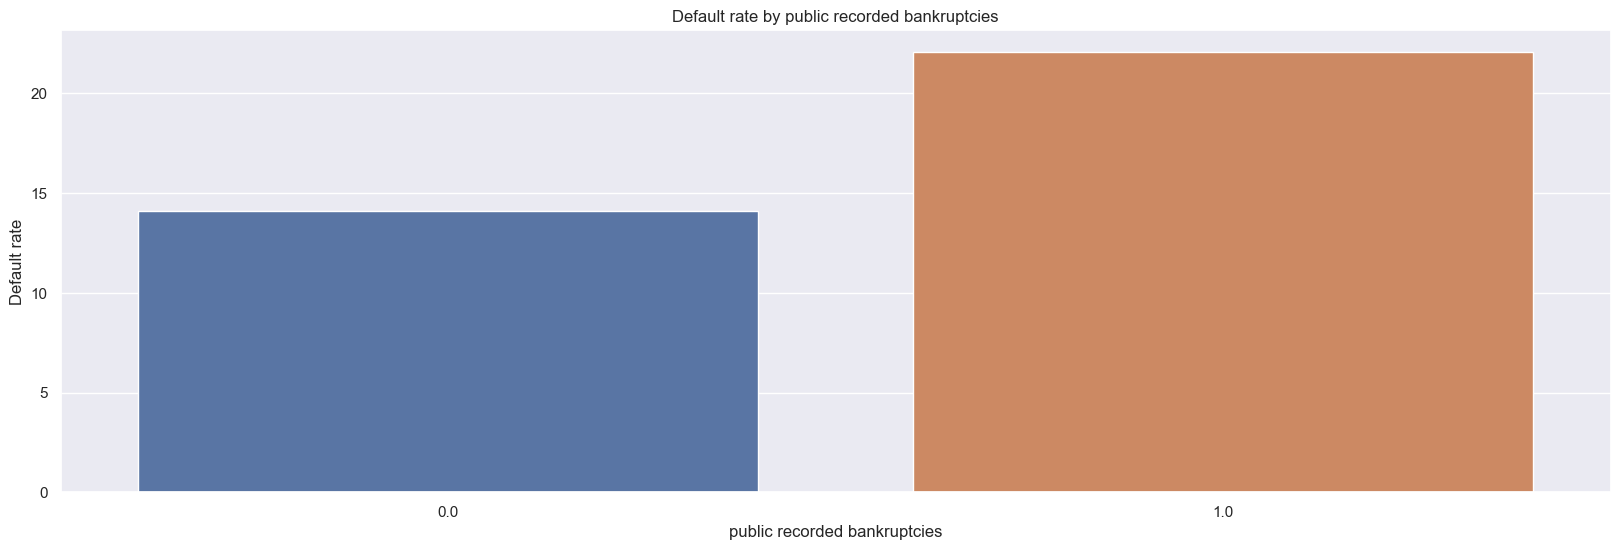

In [56]:
print(loans['pub_rec_bankruptcies'].value_counts())

# ignore 2 public recorded bankruptcies as they are very few
loans = loans[loans['pub_rec_bankruptcies'] != 2]

# draw default by pub_rec_bankruptcies
plt.figure(figsize=(20, 6))
default_rate = loans.groupby(['pub_rec_bankruptcies']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='pub_rec_bankruptcies', y='default', data=default_rate)
plt.title('Default rate by public recorded bankruptcies')
plt.xlabel('public recorded bankruptcies')
plt.ylabel('Default rate')
plt.show()


### Default rate by interest rate (not relevant)

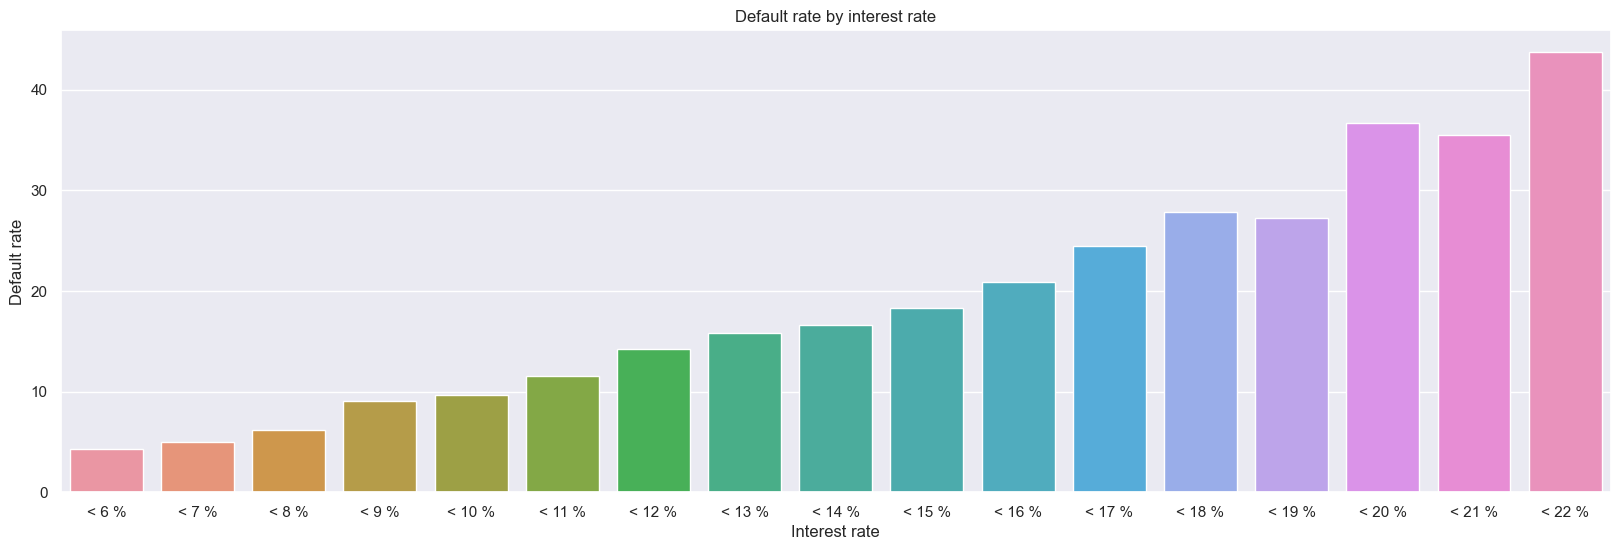

In [57]:
# draw default by binned interest rate
plt.figure(figsize=(20, 6))
default_rate_interest = loans[['int_rate', 'default']].copy()
# bin interest rate using intervals of 1% on column 'int_rate'
bin_edges = range(int(default_rate_interest['int_rate'].min()), int(default_rate_interest['int_rate'].max() + 1), 1)
default_rate_interest['int_rate_bin'] = pd.cut(default_rate_interest['int_rate'], bins=bin_edges, include_lowest=True, right=False)
default_rate_interest = default_rate_interest.groupby(['int_rate_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='int_rate_bin', y='default', data=default_rate_interest)
plt.title('Default rate by interest rate')
plt.xlabel('Interest rate')
bar_plot.set_xticklabels([f"< {str(interval.right)} %" for interval in default_rate_interest['int_rate_bin']])
plt.ylabel('Default rate')
plt.show()

### Default rate by loan amount (good impact)

Default rate is higher for higher loan amounts.

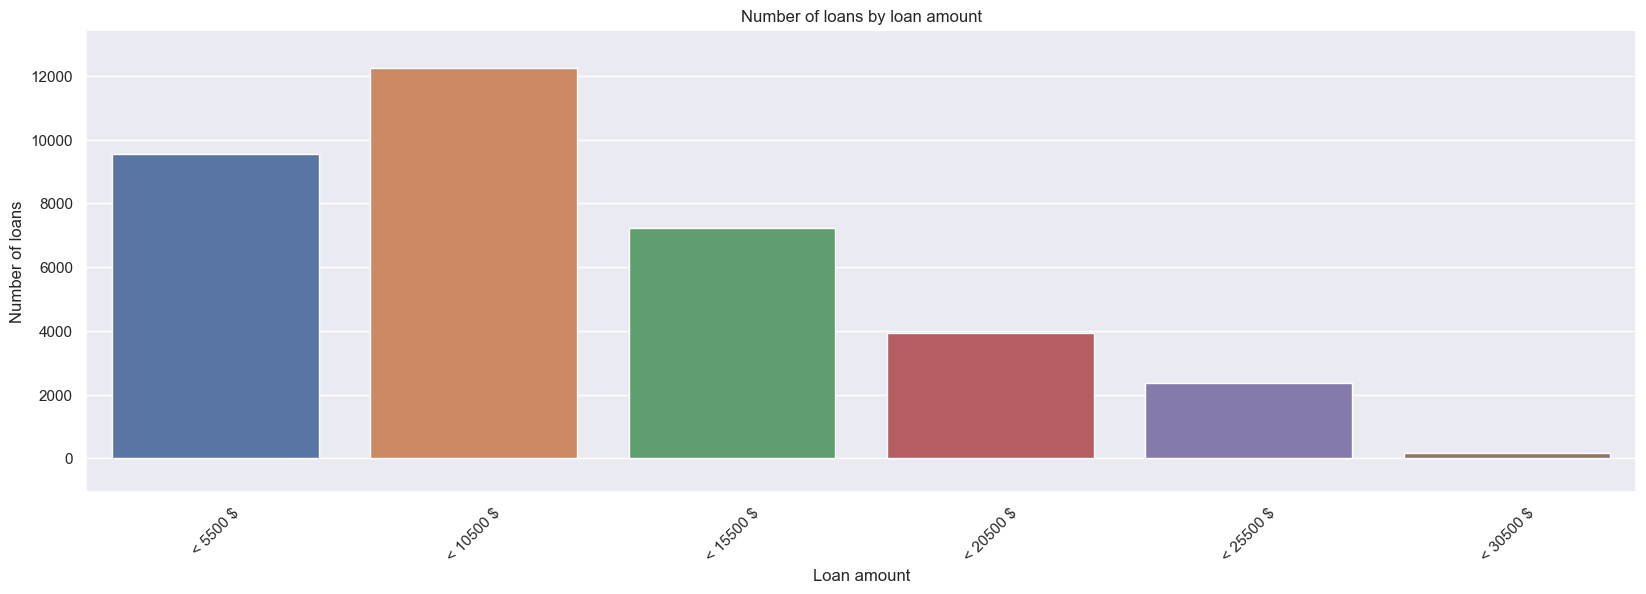

In [58]:
# plot number of loans by binned loan amount
plt.figure(figsize=(20, 6))
default_rate_loan_amount = loans[['loan_amnt', 'default']].copy()
# bin loan amount using intervals of 2000 on column 'loan_amnt'
bin_size = 5000
bin_edges = range(int(default_rate_loan_amount['loan_amnt'].min()), int(default_rate_loan_amount['loan_amnt'].max() + bin_size), bin_size)
default_rate_loan_amount['loan_amnt_bin'] = pd.cut(default_rate_loan_amount['loan_amnt'], bins=bin_edges, include_lowest=True, right=False)
default_rate_loan_amount = default_rate_loan_amount.groupby(['loan_amnt_bin']).agg({'default': 'count'}).reset_index()

bar_plot = sns.barplot(x='loan_amnt_bin', y='default', data=default_rate_loan_amount)

# Get the minimum and maximum values from your data
min_val = default_rate_loan_amount['default'].min()
max_val = default_rate_loan_amount['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Number of loans by loan amount')
plt.xlabel('Loan amount')
bar_plot.set_xticklabels([f"< {str(interval.right)} $" for interval in default_rate_loan_amount['loan_amnt_bin']], rotation=45)
plt.ylabel('Number of loans')
plt.show()

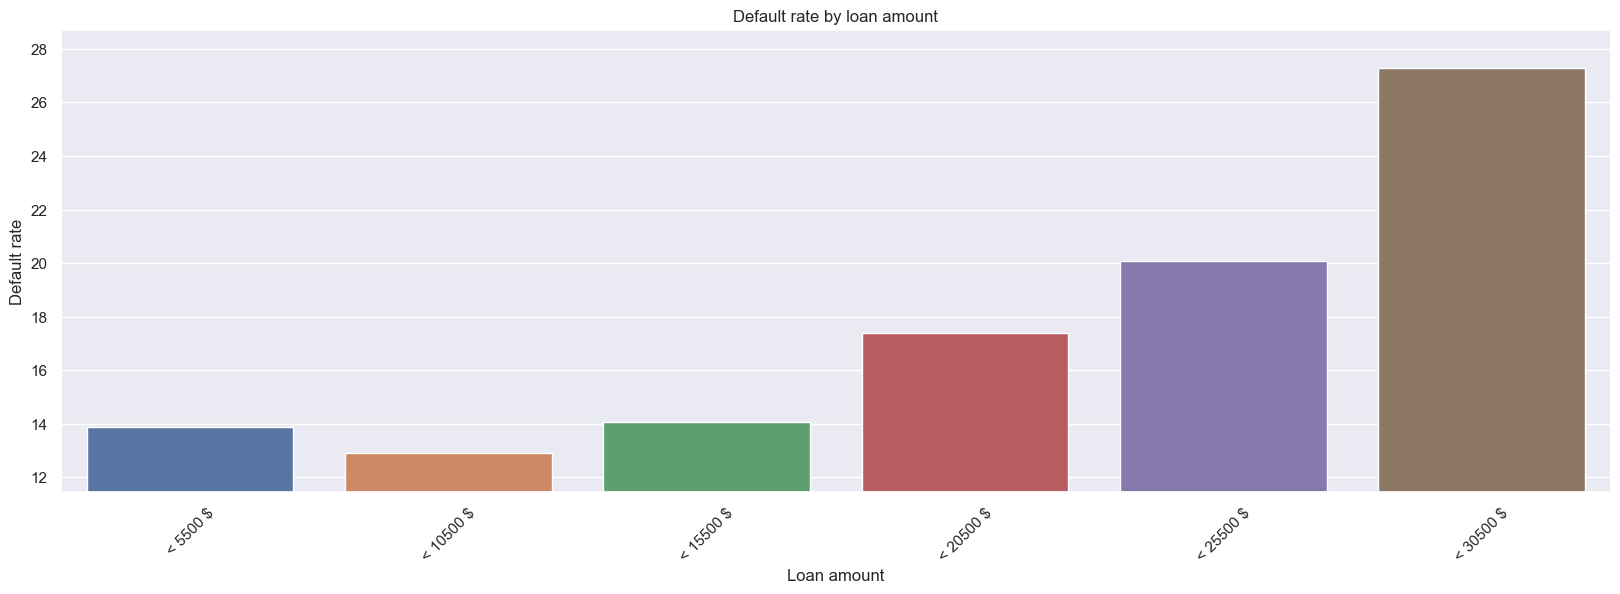

In [59]:
# plot default rate by binned loan amount
plt.figure(figsize=(20, 6))
default_rate_loan_amount = loans[['loan_amnt', 'default']].copy()
# bin loan amount using intervals of 2000 on column 'loan_amnt'
bin_size = 5000
bin_edges = range(int(default_rate_loan_amount['loan_amnt'].min()), int(default_rate_loan_amount['loan_amnt'].max() + bin_size), bin_size)

default_rate_loan_amount['loan_amnt_bin'] = pd.cut(default_rate_loan_amount['loan_amnt'], bins=bin_edges, include_lowest=True, right=False)
default_rate_loan_amount = default_rate_loan_amount.groupby(['loan_amnt_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='loan_amnt_bin', y='default', data=default_rate_loan_amount)

# Get the minimum and maximum values from your data
min_val = default_rate_loan_amount['default'].min()
max_val = default_rate_loan_amount['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by loan amount')
plt.xlabel('Loan amount')
bar_plot.set_xticklabels([f"< {str(interval.right)} $" for interval in default_rate_loan_amount['loan_amnt_bin']], rotation=45)
plt.ylabel('Default rate')
plt.show()

### Default rate by debt to income ratio (good impact)

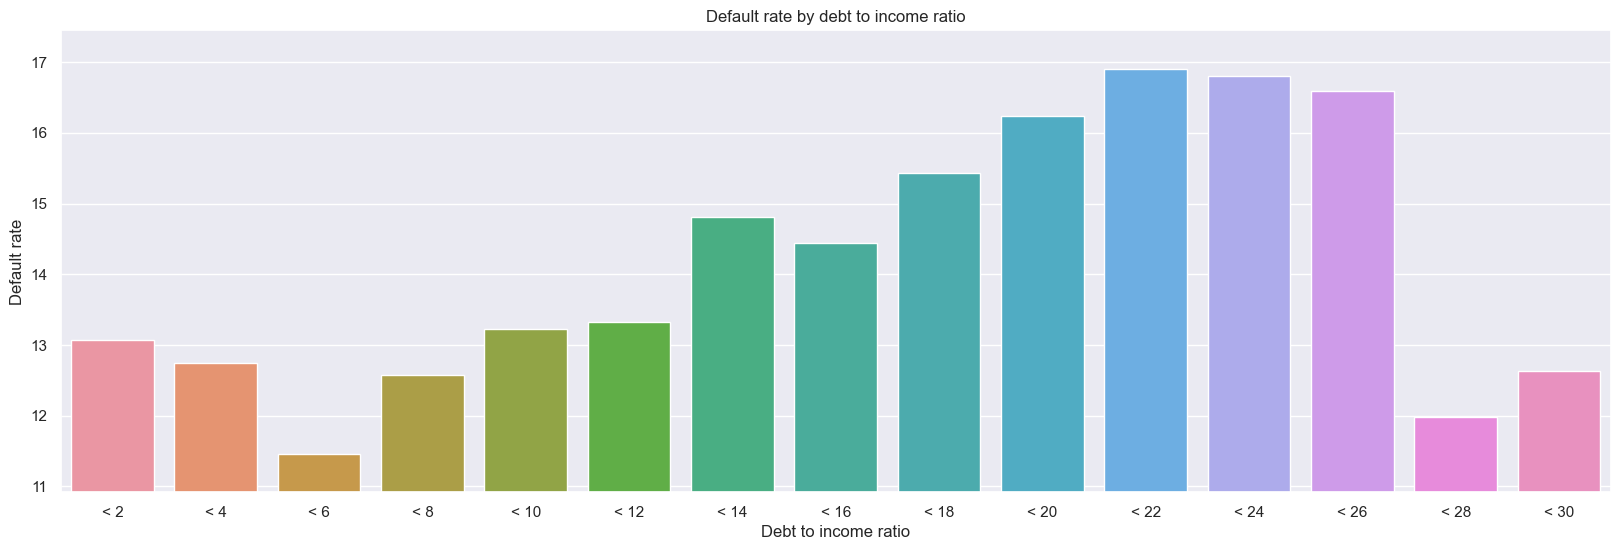

In [60]:
# plot default rate by dti
plt.figure(figsize=(20, 6))
default_rate_dti = loans[['dti', 'default']].copy()

# bin dti using intervals of 5 on column 'dti'
bin_edges = range(int(default_rate_dti['dti'].min()), int(default_rate_dti['dti'].max() + 2), 2)
default_rate_dti['dti_bin'] = pd.cut(default_rate_dti['dti'], bins=bin_edges, include_lowest=True, right=False)
default_rate_dti = default_rate_dti.groupby(['dti_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='dti_bin', y='default', data=default_rate_dti)

# Get the minimum and maximum values from your data
min_val = default_rate_dti['default'].min()
max_val = default_rate_dti['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by debt to income ratio')
plt.xlabel('Debt to income ratio')
bar_plot.set_xticklabels([f"< {str(interval.right)}" for interval in default_rate_dti['dti_bin']])
plt.ylabel('Default rate')
plt.show()

### Default rate by employment length (no impact)

Employment length has no impact on default rate.

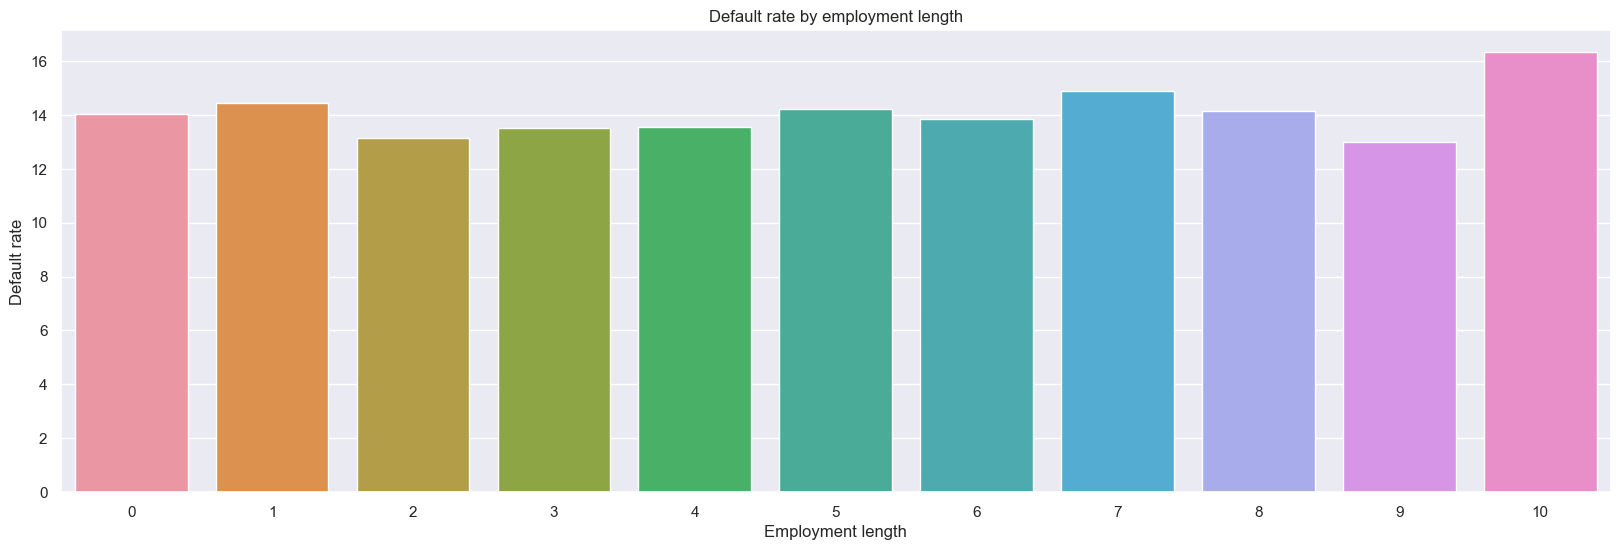

In [61]:
# plot default rate by emp_length
plt.figure(figsize=(20, 6))
default_rate_emp_length = loans[['emp_length', 'default']].copy()
default_rate_emp_length = default_rate_emp_length.groupby(['emp_length']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='emp_length', y='default', data=default_rate_emp_length)
plt.title('Default rate by employment length')
plt.xlabel('Employment length')
plt.ylabel('Default rate')
plt.show()

### Default rate by verification status (no impact)

Verification status of the lendee does not seem to have any impact on the default rate.

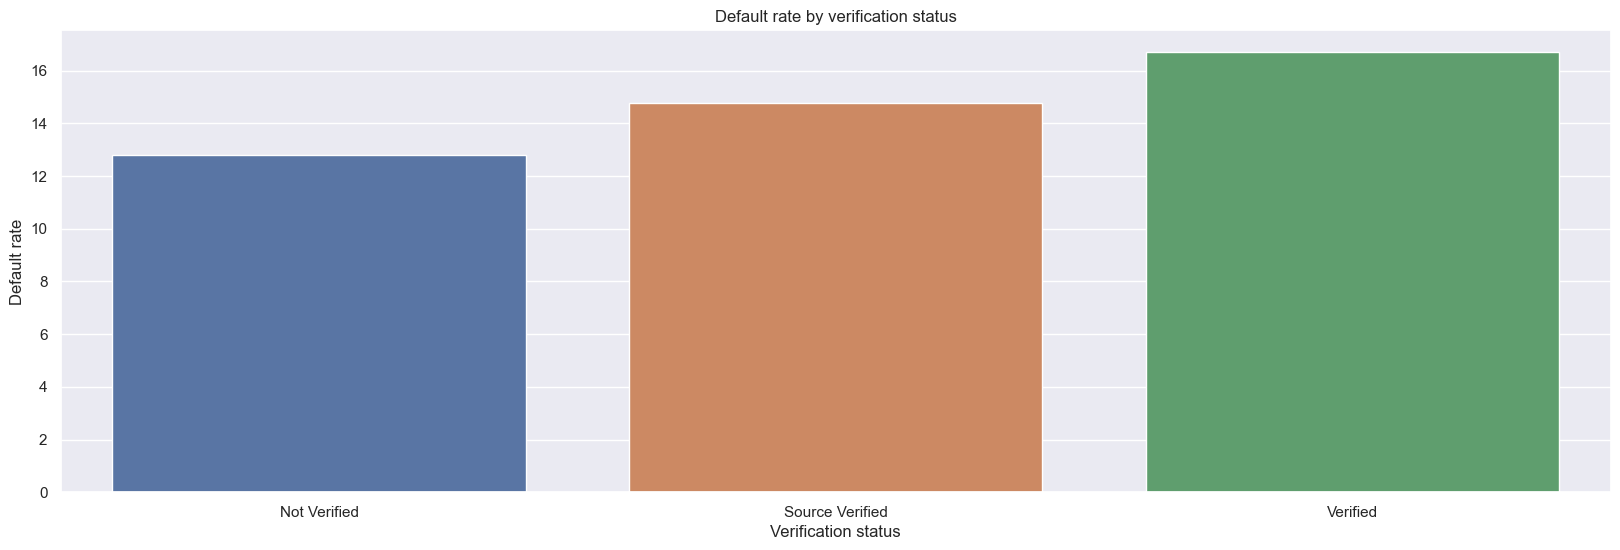

In [62]:
# plot default rate by verification_status
plt.figure(figsize=(20, 6))
default_rate_verification_status = loans[['verification_status', 'default']].copy()
default_rate_verification_status = default_rate_verification_status.groupby(['verification_status']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='verification_status', y='default', data=default_rate_verification_status)
plt.title('Default rate by verification status')
plt.xlabel('Verification status')
plt.ylabel('Default rate')
plt.show()

### Default rate by closed credit lines (good impact)

Default rate reduces with increase in closed credit lines, mening that people with more closed credit lines are more likely to pay back the loan due to their richer credit history

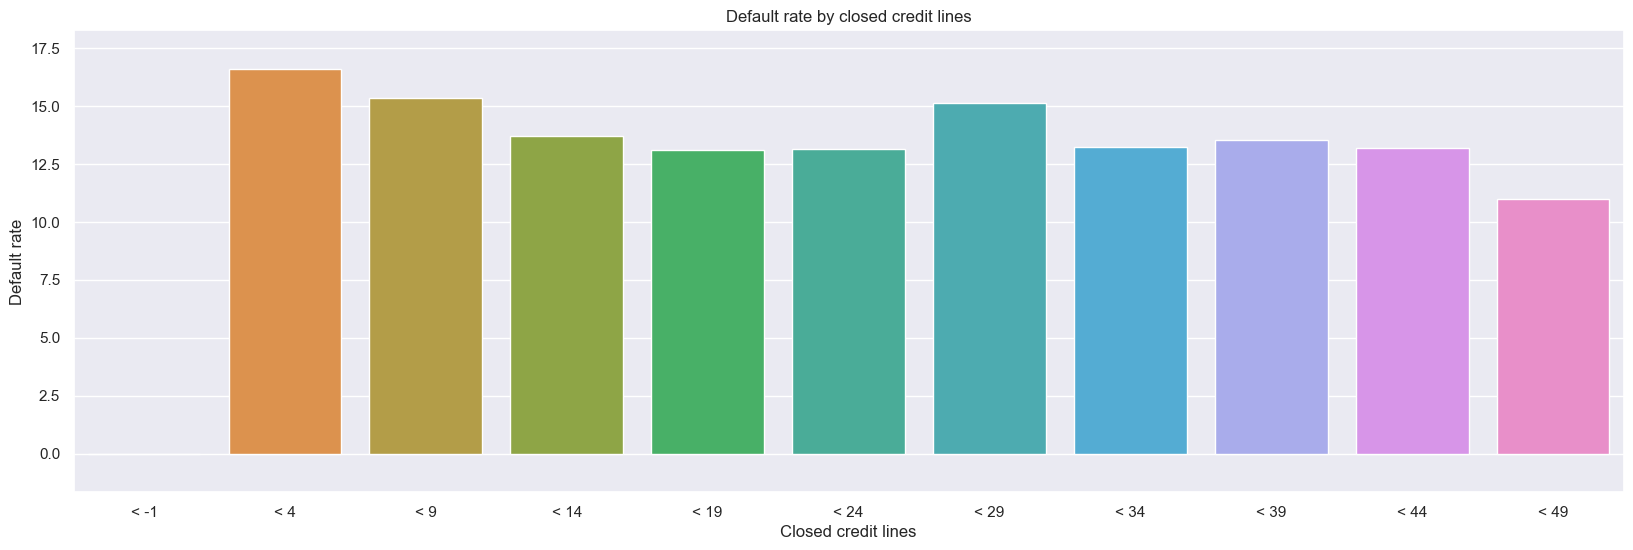

In [63]:
# create new column closed_acc
loans['closed_acc'] = loans['total_acc'] - loans['open_acc']

# plot default rate by binned closed credit lines
plt.figure(figsize=(20, 6))
default_rate_closed_acc = loans[['closed_acc', 'default']].copy()
# remove outliers for closed_acc
default_rate_closed_acc = default_rate_closed_acc[default_rate_closed_acc['closed_acc'] < 50]
# bin closed_acc using intervals of 5 on column 'closed_acc'
bin_size = 5
bin_edges = range(int(default_rate_closed_acc['closed_acc'].min()), int(default_rate_closed_acc['closed_acc'].max() + bin_size), bin_size)
default_rate_closed_acc['closed_acc_bin'] = pd.cut(default_rate_closed_acc['closed_acc'], bins=bin_edges, include_lowest=True, right=False)
default_rate_closed_acc = default_rate_closed_acc.groupby(['closed_acc_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='closed_acc_bin', y='default', data=default_rate_closed_acc)

# Get the minimum and maximum values from your data
min_val = default_rate_closed_acc['default'].min()
max_val = default_rate_closed_acc['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by closed credit lines')
plt.xlabel('Closed credit lines')
bar_plot.set_xticklabels([f"< {str(interval.right)}" for interval in default_rate_closed_acc['closed_acc_bin']])
plt.ylabel('Default rate')
plt.show()

### Default rate by revolving credit utilization (huge impact)

Default rate increases with increase in revolving credit utilization, meaning that people with higher credit utilization are more likely to default on the loan as they have much less margin for error

Number of loans is almost evenly distributed across the credit utilization range

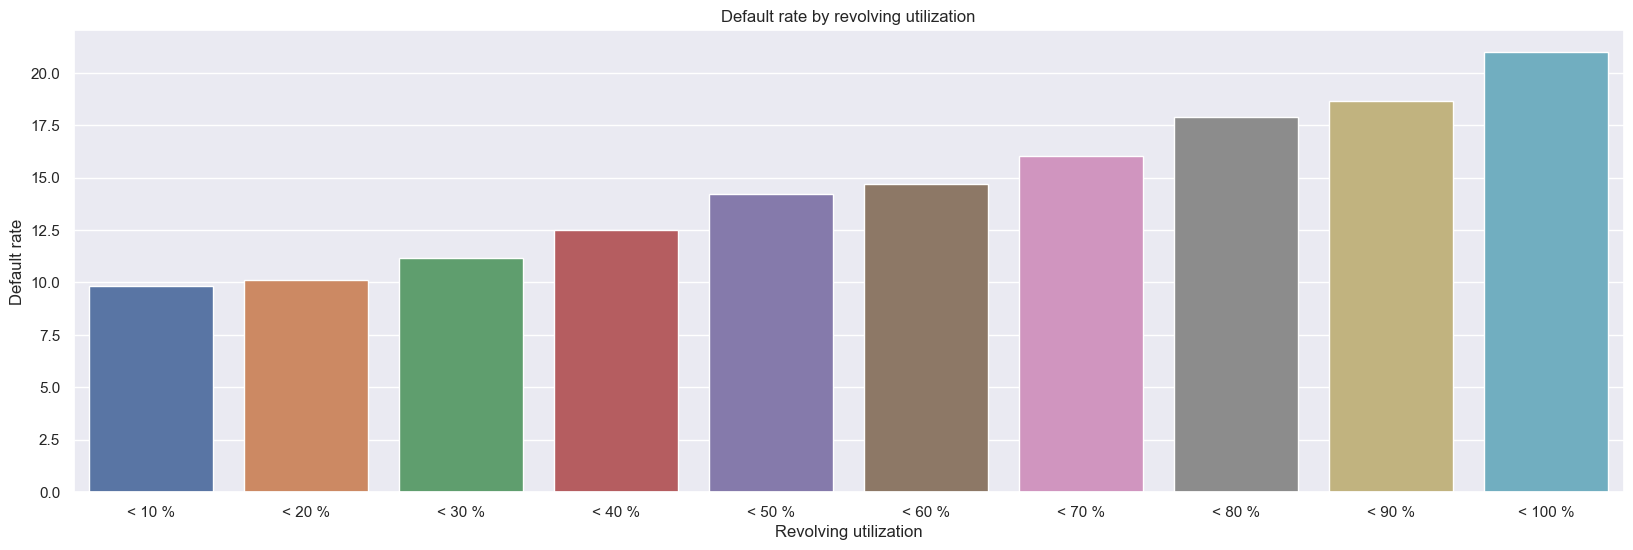

In [64]:
# plot default rate by binned revol_util
plt.figure(figsize=(20, 6))
default_rate_revol_util = loans[['revol_util', 'default']].copy()

# bin revol_util using intervals of 10 on column 'revol_util'
bin_size = 10
bin_edges = range(int(default_rate_revol_util['revol_util'].min()), int(default_rate_revol_util['revol_util'].max() + bin_size), bin_size)
default_rate_revol_util['revol_util_bin'] = pd.cut(default_rate_revol_util['revol_util'], bins=bin_edges, include_lowest=True, right=False)
default_rate_revol_util = default_rate_revol_util.groupby(['revol_util_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='revol_util_bin', y='default', data=default_rate_revol_util)
plt.title('Default rate by revolving utilization')
plt.xlabel('Revolving utilization')
bar_plot.set_xticklabels([f"< {str(interval.right)} %" for interval in default_rate_revol_util['revol_util_bin']])
plt.ylabel('Default rate')
plt.show()

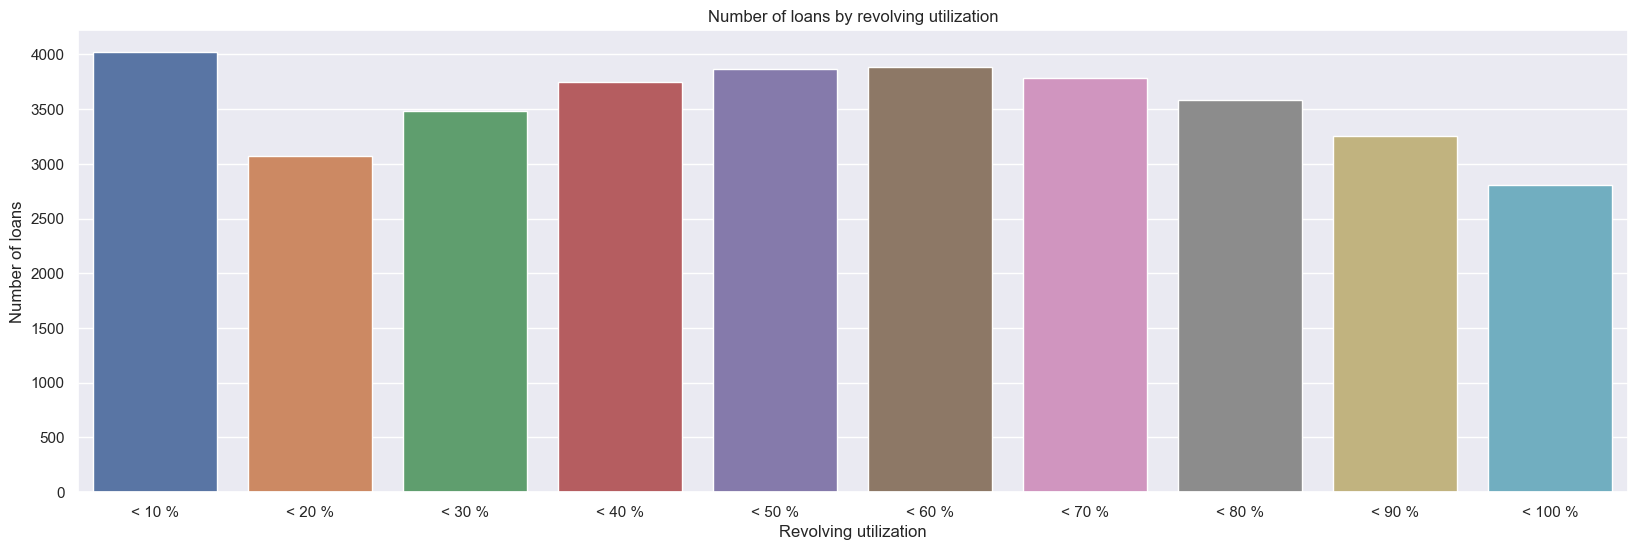

In [65]:
# plot number of loans by revol_util
plt.figure(figsize=(20, 6))
default_rate_revol_util = loans[['revol_util', 'default']].copy()
# remove outliers for revol_util
default_rate_revol_util = default_rate_revol_util[default_rate_revol_util['revol_util'] < 100]
# bin revol_util using intervals of 10 on column 'revol_util'
bin_size = 10
bin_edges = range(int(default_rate_revol_util['revol_util'].min()), int(default_rate_revol_util['revol_util'].max() + bin_size), bin_size)
default_rate_revol_util['revol_util_bin'] = pd.cut(default_rate_revol_util['revol_util'], bins=bin_edges, include_lowest=True, right=False)
default_rate_revol_util = default_rate_revol_util.groupby(['revol_util_bin']).agg({'default': 'count'}).reset_index()

bar_plot = sns.barplot(x='revol_util_bin', y='default', data=default_rate_revol_util)
plt.title('Number of loans by revolving utilization')
plt.xlabel('Revolving utilization')
bar_plot.set_xticklabels([f"< {str(interval.right)} %" for interval in default_rate_revol_util['revol_util_bin']])
plt.ylabel('Number of loans')
plt.show()

### Default rate by number of inquiries (good impact)

Default rate is much higher for people with more inquiries, this could be because they are looking for more loans and worsening their financial situation

0    17324
1     9802
2     5162
3     2705
4      275
5      128
6       51
7       30
8       10
Name: inq_last_6mths, dtype: int64


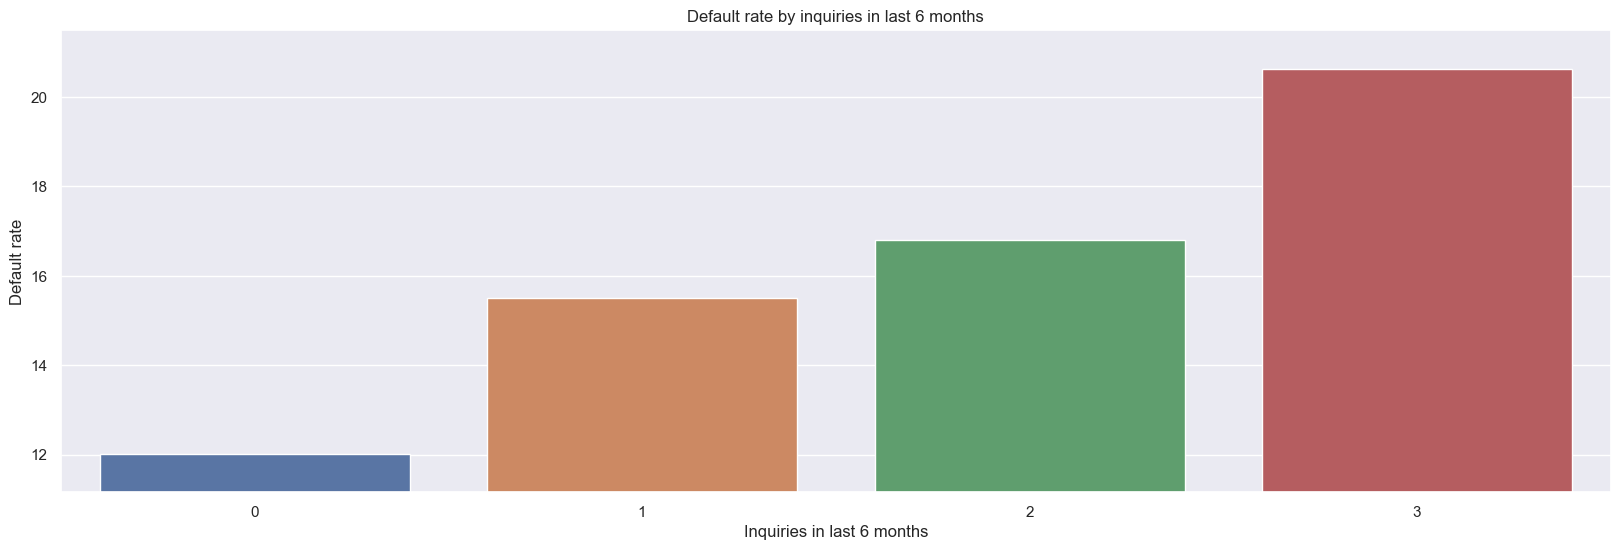

In [66]:
# plot default rate by inq_last_6mths
plt.figure(figsize=(20, 6))
default_rate_inq_last_6mths = loans[['inq_last_6mths', 'default']].copy()

print(loans['inq_last_6mths'].value_counts())

# remove outliers for inq_last_6mths, for values greater than or equal to 4 as they are very few
default_rate_inq_last_6mths = default_rate_inq_last_6mths[default_rate_inq_last_6mths['inq_last_6mths'] < 4]

default_rate_inq_last_6mths = default_rate_inq_last_6mths.groupby(['inq_last_6mths']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='inq_last_6mths', y='default', data=default_rate_inq_last_6mths)

# Get the minimum and maximum values from your data
min_val = default_rate_inq_last_6mths['default'].min()
max_val = default_rate_inq_last_6mths['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by inquiries in last 6 months')
plt.xlabel('Inquiries in last 6 months')
plt.ylabel('Default rate')
plt.show()


### Default rate by delinquencies for past 2 years (good impact)

Default rate increases with increase in delinquencies for past 2 years, meaning that people with more delinquencies are more likely to default on the loan as they have a history of not paying back their loans

0     31679
1      2931
2       591
3       195
4        55
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64


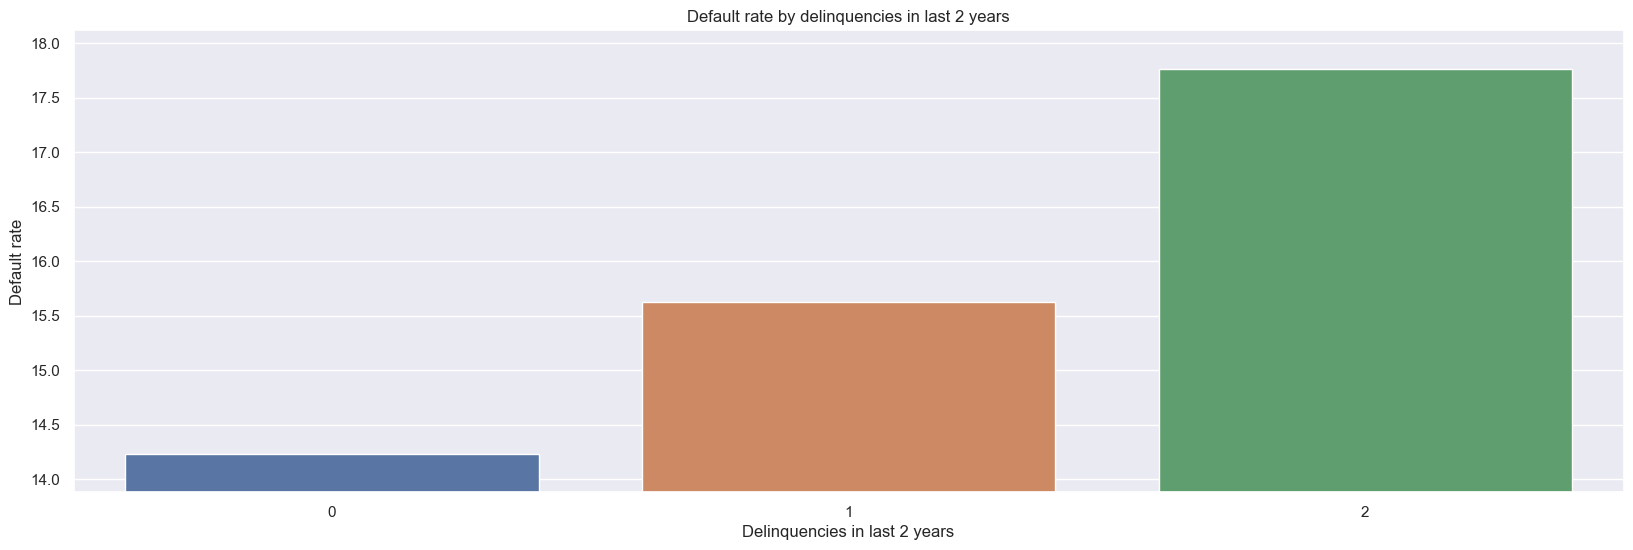

In [67]:
# plot default rate by delinq_2yrs
plt.figure(figsize=(20, 6))
default_rate_delinq_2yrs = loans[['delinq_2yrs', 'default']].copy()

print(default_rate_delinq_2yrs['delinq_2yrs'].value_counts())

# for values greater than or equal to 3 as they are very few records, so remove them
default_rate_delinq_2yrs = default_rate_delinq_2yrs[default_rate_delinq_2yrs['delinq_2yrs'] < 3]

default_rate_delinq_2yrs = default_rate_delinq_2yrs.groupby(['delinq_2yrs']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='delinq_2yrs', y='default', data=default_rate_delinq_2yrs)

# Get the minimum and maximum values from your data
min_val = default_rate_delinq_2yrs['default'].min()
max_val = default_rate_delinq_2yrs['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by delinquencies in last 2 years')
plt.xlabel('Delinquencies in last 2 years')
plt.ylabel('Default rate')
plt.show()